In [137]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import glob

/tmp/ipykernel_108098/40850068.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [5]:
# WACCM_data_alt = '90-150km'
WACCM_UL = 150

# win_Monthfolderstr = 'Dec-Feb'
# win_ds_months = ['12','01','02']

# spr_Monthfolderstr = 'Mar-May'
# spr_ds_months = ['03','04','05']

# sum_Monthfolderstr = 'Jun-Aug'
# sum_ds_months = ['06','07','08']

# aut_Monthfolderstr = 'Sep-Nov'
# aut_ds_months = ['09','10','11']
   

win_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Dec-Feb_90-150km_0.25sigma_2xMpza_1xpeak.nc'
spr_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Mar-May_90-150km_0.25sigma_2xMpza_1xpeak.nc'
sum_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Jun-Aug_90-150km_0.25sigma_2xMpza_1xpeak.nc'
aut_file_cli = f'/nobackup/py21cb/es/cli_cha/cli_cha_SpE_Output_Sep-Nov_90-150km_0.25sigma_2xMpza_1xpeak.nc'

win_file_Smax = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_Dec-Feb_90-150km_0.25sigma_2xMpza_1xpeak.nc'
spr_file_Smax = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_Mar-May_90-150km_0.25sigma_2xMpza_1xpeak.nc'
sum_file_Smax = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_Jun-Aug_90-150km_0.25sigma_2xMpza_1xpeak.nc'
aut_file_Smax = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_Sep-Nov_90-150km_0.25sigma_2xMpza_1xpeak.nc'


ds_months_ar = np.arange(0,3)   

ds_win_cli = xr.open_dataset(win_file_cli, decode_times=False)
ds_spr_cli = xr.open_dataset(spr_file_cli, decode_times=False)
ds_sum_cli = xr.open_dataset(sum_file_cli, decode_times=False)
ds_aut_cli = xr.open_dataset(aut_file_cli, decode_times=False)

ds_win_Smax = xr.open_dataset(win_file_Smax, decode_times=False)
ds_spr_Smax = xr.open_dataset(spr_file_Smax, decode_times=False)
ds_sum_Smax = xr.open_dataset(sum_file_Smax, decode_times=False)
ds_aut_Smax = xr.open_dataset(aut_file_Smax, decode_times=False)


# Climate change varible creation

In [72]:

lev_sl = ds_win_cli.variables['lev_sl']
lat = ds_win_cli.variables['lat']
intlat = ds_win_cli.variables['latsl']
lon = ds_win_cli.variables['lon']
LT = ds_win_cli.variables['LT']

#Zavg_sl = ds_win_cli.variables['Zavg_sl']

altavg_sl_win_cli = ds_win_cli.variables['altavg_sl']
altavg_sl_spr_cli = ds_spr_cli.variables['altavg_sl']
altavg_sl_sum_cli = ds_sum_cli.variables['altavg_sl']
altavg_sl_aut_cli = ds_aut_cli.variables['altavg_sl']

times_str_min_cli = ds_win_cli.variables['times_str_min']
times_str_max_cli = ds_win_cli.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
win_SpEs_Occ_Freq_llbav_cli = ds_win_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
win_SpEsns_Occ_Freq_llav_cli = ds_win_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
win_SpEsns_Occ_Freq_lat_cli = ds_win_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

win_SpEsns_Occ_Fr_dsavg_cli = ds_win_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
win_SpEs_Occ_Fr_b_dsavg_cli = ds_win_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
win_alt_sl_sh_avg_b_dsavg_cli = ds_win_cli.variables['alt_sl_sh_avg_b_dsavg']
win_alt_sl_sh_avg_b_dsavgg_cli = win_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

win_SpEs_Occ_Fr_b_dsavgLT_cli = ds_win_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
win_alt_sl_sh_avg_b_dsavgLT_cli = ds_win_cli.variables['alt_sl_sh_avg_b_dsavgLT']
win_alt_sl_sh_avg_b_dsavgLTT_cli = win_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

win_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_win_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
win_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_win_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
win_alt_sl_sh_avg_bb_5d_dsavgg_cli = win_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])

#=====================================================================
# # # S P R I N G # # # 
spr_SpEs_Occ_Freq_llbav_cli = ds_spr_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
spr_SpEsns_Occ_Freq_llav_cli = ds_spr_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
spr_SpEsns_Occ_Freq_lat_cli = ds_spr_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

spr_SpEsns_Occ_Fr_dsavg_cli = ds_spr_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
spr_SpEs_Occ_Fr_b_dsavg_cli = ds_spr_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
spr_alt_sl_sh_avg_b_dsavg_cli = ds_spr_cli.variables['alt_sl_sh_avg_b_dsavg']
spr_alt_sl_sh_avg_b_dsavgg_cli = spr_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

spr_SpEs_Occ_Fr_b_dsavgLT_cli = ds_spr_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
spr_alt_sl_sh_avg_b_dsavgLT_cli = ds_spr_cli.variables['alt_sl_sh_avg_b_dsavgLT']
spr_alt_sl_sh_avg_b_dsavgLTT_cli = spr_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

spr_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_spr_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
spr_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_spr_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
spr_alt_sl_sh_avg_bb_5d_dsavgg_cli = spr_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])

#=====================================================================
# # # S U M M E R # # # 
sum_SpEs_Occ_Freq_llbav_cli = ds_sum_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
sum_SpEsns_Occ_Freq_llav_cli = ds_sum_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
sum_SpEsns_Occ_Freq_lat_cli = ds_sum_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

sum_SpEsns_Occ_Fr_dsavg_cli = ds_sum_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
sum_SpEs_Occ_Fr_b_dsavg_cli = ds_sum_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
sum_alt_sl_sh_avg_b_dsavg_cli = ds_sum_cli.variables['alt_sl_sh_avg_b_dsavg']
sum_alt_sl_sh_avg_b_dsavgg_cli= sum_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

sum_SpEs_Occ_Fr_b_dsavgLT_cli = ds_sum_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
sum_alt_sl_sh_avg_b_dsavgLT_cli = ds_sum_cli.variables['alt_sl_sh_avg_b_dsavgLT']
sum_alt_sl_sh_avg_b_dsavgLTT_cli = sum_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_sum_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_sum_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg_cli = sum_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d_cli = ds_sum_cli.variables['Mptdens_avv1_b_5d']

#=====================================================================
# # # A U T U M N # # # 
aut_SpEs_Occ_Freq_llbav_cli = ds_aut_cli.variables['SpEs_Occ_Freq_llbav']  #lat,LT
aut_SpEsns_Occ_Freq_llav_cli = ds_aut_cli.variables['SpEsns_Occ_Freq_llav']  #lat,lon
aut_SpEsns_Occ_Freq_lat_cli = ds_aut_cli.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

aut_SpEsns_Occ_Fr_dsavg_cli = ds_aut_cli.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
aut_SpEs_Occ_Fr_b_dsavg_cli = ds_aut_cli.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
aut_alt_sl_sh_avg_b_dsavg_cli = ds_aut_cli.variables['alt_sl_sh_avg_b_dsavg']
aut_alt_sl_sh_avg_b_dsavgg_cli = aut_alt_sl_sh_avg_b_dsavg_cli.mean(dim=['lat', 'LT'])

aut_SpEs_Occ_Fr_b_dsavgLT_cli = ds_aut_cli.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
aut_alt_sl_sh_avg_b_dsavgLT_cli = ds_aut_cli.variables['alt_sl_sh_avg_b_dsavgLT']
aut_alt_sl_sh_avg_b_dsavgLTT_cli = aut_alt_sl_sh_avg_b_dsavgLT_cli.mean(dim=['lat'])

aut_SpEs_Occ_Fr_bb_5d_dsavg_cli = ds_aut_cli.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
aut_alt_sl_sh_avg_bb_5d_dsavg_cli = ds_aut_cli.variables['alt_sl_sh_avg_bb_5d_dsavg']
aut_alt_sl_sh_avg_bb_5d_dsavgg_cli = aut_alt_sl_sh_avg_bb_5d_dsavg_cli.mean(dim=['LT'])


In [73]:
# No of measurements (alt-lat-LT)

SpEs_freq_time_spr_cli = ds_spr_cli.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEsns_freq_time_spr_cli = ds_spr_cli.variables['SpEsns_freq_time']   #('lev_sl', 'lat', 'lon', 'timesl', 'mth')

SpEs_freq_time_sum_cli = ds_sum_cli.variables['SpEs_freq_time']  
SpEsns_freq_time_sum_cli = ds_sum_cli.variables['SpEsns_freq_time'] 

SpEs_freq_time_aut_cli = ds_aut_cli.variables['SpEs_freq_time']  
SpEsns_freq_time_aut_cli = ds_aut_cli.variables['SpEsns_freq_time'] 

SpEs_freq_time_win_cli = ds_win_cli.variables['SpEs_freq_time']  
SpEsns_freq_time_win_cli = ds_win_cli.variables['SpEsns_freq_time'] 

#----------------------------------------

#On alt-lat-(LT) grid 
#No of measurements per month 
SpEs_mth_spr_cli = np.sum(SpEs_freq_time_spr_cli, axis=3)  # sum_cli along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_cli = np.sum(SpEs_freq_time_sum_cli, axis=3)  
SpEs_mth_aut_cli = np.sum(SpEs_freq_time_aut_cli, axis=3)  
SpEs_mth_win_cli = np.sum(SpEs_freq_time_win_cli, axis=3)   
#No of measurements per season
tot_SpEs_spr_cli = np.sum(SpEs_mth_spr_cli, axis=3)  # sum_cli along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_cli = np.sum(SpEs_mth_sum_cli, axis=3)  
tot_SpEs_aut_cli = np.sum(SpEs_mth_aut_cli, axis=3)  
tot_SpEs_win_cli = np.sum(SpEs_mth_win_cli, axis=3)  


#for lat-(LT) plots
SpEs_spr_cli_lat_LT = np.sum(tot_SpEs_spr_cli, axis=0)
SpEs_sum_cli_lat_LT = np.sum(tot_SpEs_sum_cli, axis=0)
SpEs_aut_cli_lat_LT = np.sum(tot_SpEs_aut_cli, axis=0)
SpEs_win_cli_lat_LT = np.sum(tot_SpEs_win_cli, axis=0)

#For alt-lat plots
SpEs_spr_cli_alt_lat = np.sum(tot_SpEs_spr_cli, axis=2)
SpEs_sum_cli_alt_lat = np.sum(tot_SpEs_sum_cli, axis=2)
SpEs_aut_cli_alt_lat = np.sum(tot_SpEs_aut_cli, axis=2)
SpEs_win_cli_alt_lat = np.sum(tot_SpEs_win_cli, axis=2)


In [74]:
# Rebinning number of measurements into 5deg slices
#==================================================

bin_edges_5deg = np.arange(-90, 91, 5)

tot_SpEs_spr_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_cli_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))


for i in range(len(bin_edges_5deg) - 1):
    # Determine the indices of the 1.89-degree bins that fall within or overlap with the current 5-degree bin
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]
    
    # Initialize an array to store the fractional overlap for each 1.89-degree bin
    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)
    
    # Loop through each 1.89-degree bin
    for j, idx in enumerate(indices_in_bin):
        # Calculate the starting and ending latitude of the current 1.89-degree bin
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2
        
        # Calculate the overlap between the 1.89-degree bin and the current 5-degree bin
        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        overlap_length = max(overlap_end - overlap_start, 0)
        bin_length = bin_end - bin_start
        
        # Calculate the fractional overlap as the ratio of overlap length to bin length
        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1
    
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_cli = tot_SpEs_spr_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_cli = tot_SpEs_sum_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_cli = tot_SpEs_aut_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_cli = tot_SpEs_win_cli[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_cli_5deg[:, i, :] = np.sum(weighted_counts_spr_cli, axis=1)
    tot_SpEs_sum_cli_5deg[:, i, :] = np.sum(weighted_counts_sum_cli, axis=1)
    tot_SpEs_aut_cli_5deg[:, i, :] = np.sum(weighted_counts_aut_cli, axis=1)
    tot_SpEs_win_cli_5deg[:, i, :] = np.sum(weighted_counts_win_cli, axis=1)
    
original_sum_cli = np.sum(tot_SpEs_spr_cli)
rebinned_sum_cli = np.sum(tot_SpEs_spr_cli_5deg)
print(f"Original sum_cli tot_SpEs_spr_cli: {original_sum_cli}, Rebinned sum_cli: {rebinned_sum_cli}")


Original sum_cli tot_SpEs_spr_cli: <xarray.Variable ()>
array(38553141.), Rebinned sum_cli: 38553141.0


In [75]:
#Define magnetic latitude lines

filename='/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-01.nc'
ds_cli = xr.open_dataset(filename)
ALATM_cli = ds_cli.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat_cli = ds_cli.variables['lat']
ALon_cli = ds_cli.variables['lon']

# Solar max varible creation

In [76]:

lev_sl = ds_win_Smax.variables['lev_sl']
lat = ds_win_Smax.variables['lat']
intlat = ds_win_Smax.variables['latsl']
lon = ds_win_Smax.variables['lon']
LT = ds_win_Smax.variables['LT']

#Zavg_sl = ds_win_Smax.variables['Zavg_sl']

altavg_sl_win_Smax = ds_win_Smax.variables['altavg_sl']
altavg_sl_spr_Smax = ds_spr_Smax.variables['altavg_sl']
altavg_sl_sum_Smax = ds_sum_Smax.variables['altavg_sl']
altavg_sl_aut_Smax = ds_aut_Smax.variables['altavg_sl']

times_str_min_Smax = ds_win_Smax.variables['times_str_min']
times_str_max_Smax = ds_win_Smax.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
win_SpEs_Occ_Freq_llbav_Smax = ds_win_Smax.variables['SpEs_Occ_Freq_llbav']  #lat,LT
win_SpEsns_Occ_Freq_llav_Smax = ds_win_Smax.variables['SpEsns_Occ_Freq_llav']  #lat,lon
win_SpEsns_Occ_Freq_lat_Smax = ds_win_Smax.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

win_SpEsns_Occ_Fr_dsavg_Smax = ds_win_Smax.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
win_SpEs_Occ_Fr_b_dsavg_Smax = ds_win_Smax.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
win_alt_sl_sh_avg_b_dsavg_Smax = ds_win_Smax.variables['alt_sl_sh_avg_b_dsavg']
win_alt_sl_sh_avg_b_dsavgg_Smax = win_alt_sl_sh_avg_b_dsavg_Smax.mean(dim=['lat', 'LT'])

win_SpEs_Occ_Fr_b_dsavgLT_Smax = ds_win_Smax.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
win_alt_sl_sh_avg_b_dsavgLT_Smax = ds_win_Smax.variables['alt_sl_sh_avg_b_dsavgLT']
win_alt_sl_sh_avg_b_dsavgLTT_Smax = win_alt_sl_sh_avg_b_dsavgLT_Smax.mean(dim=['lat'])

win_SpEs_Occ_Fr_bb_5d_dsavg_Smax = ds_win_Smax.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
win_alt_sl_sh_avg_bb_5d_dsavg_Smax = ds_win_Smax.variables['alt_sl_sh_avg_bb_5d_dsavg']
win_alt_sl_sh_avg_bb_5d_dsavgg_Smax = win_alt_sl_sh_avg_bb_5d_dsavg_Smax.mean(dim=['LT'])

#=====================================================================
# # # S P R I N G # # # 
spr_SpEs_Occ_Freq_llbav_Smax = ds_spr_Smax.variables['SpEs_Occ_Freq_llbav']  #lat,LT
spr_SpEsns_Occ_Freq_llav_Smax = ds_spr_Smax.variables['SpEsns_Occ_Freq_llav']  #lat,lon
spr_SpEsns_Occ_Freq_lat_Smax = ds_spr_Smax.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

spr_SpEsns_Occ_Fr_dsavg_Smax = ds_spr_Smax.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height 
spr_SpEs_Occ_Fr_b_dsavg_Smax = ds_spr_Smax.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height
spr_alt_sl_sh_avg_b_dsavg_Smax = ds_spr_Smax.variables['alt_sl_sh_avg_b_dsavg']
spr_alt_sl_sh_avg_b_dsavgg_Smax = spr_alt_sl_sh_avg_b_dsavg_Smax.mean(dim=['lat', 'LT'])

spr_SpEs_Occ_Fr_b_dsavgLT_Smax = ds_spr_Smax.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
spr_alt_sl_sh_avg_b_dsavgLT_Smax = ds_spr_Smax.variables['alt_sl_sh_avg_b_dsavgLT']
spr_alt_sl_sh_avg_b_dsavgLTT_Smax = spr_alt_sl_sh_avg_b_dsavgLT_Smax.mean(dim=['lat'])

spr_SpEs_Occ_Fr_bb_5d_dsavg_Smax = ds_spr_Smax.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT 
spr_alt_sl_sh_avg_bb_5d_dsavg_Smax = ds_spr_Smax.variables['alt_sl_sh_avg_bb_5d_dsavg']
spr_alt_sl_sh_avg_bb_5d_dsavgg_Smax = spr_alt_sl_sh_avg_bb_5d_dsavg_Smax.mean(dim=['LT'])

#=====================================================================
# # # S U M M E R # # # 
sum_SpEs_Occ_Freq_llbav_Smax = ds_sum_Smax.variables['SpEs_Occ_Freq_llbav']  #lat,LT
sum_SpEsns_Occ_Freq_llav_Smax = ds_sum_Smax.variables['SpEsns_Occ_Freq_llav']  #lat,lon
sum_SpEsns_Occ_Freq_lat_Smax = ds_sum_Smax.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

sum_SpEsns_Occ_Fr_dsavg_Smax = ds_sum_Smax.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
sum_SpEs_Occ_Fr_b_dsavg_Smax = ds_sum_Smax.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
sum_alt_sl_sh_avg_b_dsavg_Smax = ds_sum_Smax.variables['alt_sl_sh_avg_b_dsavg']
sum_alt_sl_sh_avg_b_dsavgg_Smax= sum_alt_sl_sh_avg_b_dsavg_Smax.mean(dim=['lat', 'LT'])

sum_SpEs_Occ_Fr_b_dsavgLT_Smax = ds_sum_Smax.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
sum_alt_sl_sh_avg_b_dsavgLT_Smax = ds_sum_Smax.variables['alt_sl_sh_avg_b_dsavgLT']
sum_alt_sl_sh_avg_b_dsavgLTT_Smax = sum_alt_sl_sh_avg_b_dsavgLT_Smax.mean(dim=['lat'])

sum_SpEs_Occ_Fr_bb_5d_dsavg_Smax = ds_sum_Smax.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
sum_alt_sl_sh_avg_bb_5d_dsavg_Smax = ds_sum_Smax.variables['alt_sl_sh_avg_bb_5d_dsavg']
sum_alt_sl_sh_avg_bb_5d_dsavgg_Smax = sum_alt_sl_sh_avg_bb_5d_dsavg_Smax.mean(dim=['LT'])
                                  
sum_Mptdens_avv1_b_5d_Smax = ds_sum_Smax.variables['Mptdens_avv1_b_5d']

#=====================================================================
# # # A U T U M N # # # 
aut_SpEs_Occ_Freq_llbav_Smax = ds_aut_Smax.variables['SpEs_Occ_Freq_llbav']  #lat,LT
aut_SpEsns_Occ_Freq_llav_Smax = ds_aut_Smax.variables['SpEsns_Occ_Freq_llav']  #lat,lon
aut_SpEsns_Occ_Freq_lat_Smax = ds_aut_Smax.variables['SpEsns_Occ_Freq_lat'] #lat only, avgd over lon

aut_SpEsns_Occ_Fr_dsavg_Smax = ds_aut_Smax.variables['SpEsns_Occ_Fr_dsavg']             # LAT - LON at specific height
aut_SpEs_Occ_Fr_b_dsavg_Smax = ds_aut_Smax.variables['SpEs_Occ_Fr_b_dsavg']             # LAT - LT at specific height 
aut_alt_sl_sh_avg_b_dsavg_Smax = ds_aut_Smax.variables['alt_sl_sh_avg_b_dsavg']
aut_alt_sl_sh_avg_b_dsavgg_Smax = aut_alt_sl_sh_avg_b_dsavg_Smax.mean(dim=['lat', 'LT'])

aut_SpEs_Occ_Fr_b_dsavgLT_Smax = ds_aut_Smax.variables['SpEs_Occ_Fr_b_dsavgLT']         # LEV - LAT 
aut_alt_sl_sh_avg_b_dsavgLT_Smax = ds_aut_Smax.variables['alt_sl_sh_avg_b_dsavgLT']
aut_alt_sl_sh_avg_b_dsavgLTT_Smax = aut_alt_sl_sh_avg_b_dsavgLT_Smax.mean(dim=['lat'])

aut_SpEs_Occ_Fr_bb_5d_dsavg_Smax = ds_aut_Smax.variables['SpEs_Occ_Fr_bb_5d_dsavg']     # LEV - LT
aut_alt_sl_sh_avg_bb_5d_dsavg_Smax = ds_aut_Smax.variables['alt_sl_sh_avg_bb_5d_dsavg']
aut_alt_sl_sh_avg_bb_5d_dsavgg_Smax = aut_alt_sl_sh_avg_bb_5d_dsavg_Smax.mean(dim=['LT'])


In [77]:
# No of measurements (alt-lat-LT)

SpEs_freq_time_spr_Smax = ds_spr_Smax.variables['SpEs_freq_time']       #('lev_sl', 'lat', 'LT_L', 'timesl', 'mth')
SpEsns_freq_time_spr_Smax = ds_spr_Smax.variables['SpEsns_freq_time']   #('lev_sl', 'lat', 'lon', 'timesl', 'mth')

SpEs_freq_time_sum_Smax = ds_sum_Smax.variables['SpEs_freq_time']  
SpEsns_freq_time_sum_Smax = ds_sum_Smax.variables['SpEsns_freq_time'] 

SpEs_freq_time_aut_Smax = ds_aut_Smax.variables['SpEs_freq_time']  
SpEsns_freq_time_aut_Smax = ds_aut_Smax.variables['SpEsns_freq_time'] 

SpEs_freq_time_win_Smax = ds_win_Smax.variables['SpEs_freq_time']  
SpEsns_freq_time_win_Smax = ds_win_Smax.variables['SpEsns_freq_time'] 

#----------------------------------------

#On alt-lat-(LT) grid 
#No of measurements per month 
SpEs_mth_spr_Smax = np.sum(SpEs_freq_time_spr_Smax, axis=3)  # sum_Smax along the 'timesl' dimension #(19, 96, 144, 3)
SpEs_mth_sum_Smax = np.sum(SpEs_freq_time_sum_Smax, axis=3)  
SpEs_mth_aut_Smax = np.sum(SpEs_freq_time_aut_Smax, axis=3)  
SpEs_mth_win_Smax = np.sum(SpEs_freq_time_win_Smax, axis=3)   
#No of measurements per season
tot_SpEs_spr_Smax = np.sum(SpEs_mth_spr_Smax, axis=3)  # sum_Smax along the 'mth' dimension   #(19, 96, 144)
tot_SpEs_sum_Smax = np.sum(SpEs_mth_sum_Smax, axis=3)  
tot_SpEs_aut_Smax = np.sum(SpEs_mth_aut_Smax, axis=3)  
tot_SpEs_win_Smax = np.sum(SpEs_mth_win_Smax, axis=3)  


#for lat-(LT) plots
SpEs_spr_Smax_lat_LT = np.sum(tot_SpEs_spr_Smax, axis=0)
SpEs_sum_Smax_lat_LT = np.sum(tot_SpEs_sum_Smax, axis=0)
SpEs_aut_Smax_lat_LT = np.sum(tot_SpEs_aut_Smax, axis=0)
SpEs_win_Smax_lat_LT = np.sum(tot_SpEs_win_Smax, axis=0)

#For alt-lat plots
SpEs_spr_Smax_alt_lat = np.sum(tot_SpEs_spr_Smax, axis=2)
SpEs_sum_Smax_alt_lat = np.sum(tot_SpEs_sum_Smax, axis=2)
SpEs_aut_Smax_alt_lat = np.sum(tot_SpEs_aut_Smax, axis=2)
SpEs_win_Smax_alt_lat = np.sum(tot_SpEs_win_Smax, axis=2)


In [78]:
# Rebinning number of measurements into 5deg slices
#==================================================

bin_edges_5deg = np.arange(-90, 91, 5)

tot_SpEs_spr_Smax_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_sum_Smax_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_aut_Smax_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))
tot_SpEs_win_Smax_5deg = np.zeros((lev_sl.shape[0], len(bin_edges_5deg) - 1, 144))


for i in range(len(bin_edges_5deg) - 1):
    # Determine the indices of the 1.89-degree bins that fall within or overlap with the current 5-degree bin
    indices_in_bin = np.where((lat >= bin_edges_5deg[i] - 1.89473684) & (lat < bin_edges_5deg[i + 1] + 1.89473684))[0]
    
    # Initialize an array to store the fractional overlap for each 1.89-degree bin
    fractional_overlap = np.zeros_like(indices_in_bin, dtype=float)
    
    # Loop through each 1.89-degree bin
    for j, idx in enumerate(indices_in_bin):
        # Calculate the starting and ending latitude of the current 1.89-degree bin
        bin_start = lat[idx] - 1.89473684 / 2
        bin_end = lat[idx] + 1.89473684 / 2
        
        # Calculate the overlap between the 1.89-degree bin and the current 5-degree bin
        overlap_start = max(bin_start, bin_edges_5deg[i])
        overlap_end = min(bin_end, bin_edges_5deg[i + 1])
        
        overlap_length = max(overlap_end - overlap_start, 0)
        bin_length = bin_end - bin_start
        
        # Calculate the fractional overlap as the ratio of overlap length to bin length
        fractional_overlap[j] = overlap_length / bin_length
    if i == 0:
        fractional_overlap[0]=1
    if i == (len(bin_edges_5deg) - 2):
        fractional_overlap[-1]=1
    
    # Multiply the counts of measurements by the fractional overlap
    weighted_counts_spr_Smax = tot_SpEs_spr_Smax[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_sum_Smax = tot_SpEs_sum_Smax[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_aut_Smax = tot_SpEs_aut_Smax[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    weighted_counts_win_Smax = tot_SpEs_win_Smax[:, indices_in_bin, :] * fractional_overlap[None, :, None]
    
    # Accumulate the weighted counts into the corresponding 5-degree bin
    tot_SpEs_spr_Smax_5deg[:, i, :] = np.sum(weighted_counts_spr_Smax, axis=1)
    tot_SpEs_sum_Smax_5deg[:, i, :] = np.sum(weighted_counts_sum_Smax, axis=1)
    tot_SpEs_aut_Smax_5deg[:, i, :] = np.sum(weighted_counts_aut_Smax, axis=1)
    tot_SpEs_win_Smax_5deg[:, i, :] = np.sum(weighted_counts_win_Smax, axis=1)
    
original_sum_Smax = np.sum(tot_SpEs_spr_Smax)
rebinned_sum_Smax = np.sum(tot_SpEs_spr_Smax_5deg)
print(f"Original sum_Smax tot_SpEs_spr_Smax: {original_sum_Smax}, Rebinned sum_Smax: {rebinned_sum_Smax}")


Original sum_Smax tot_SpEs_spr_Smax: <xarray.Variable ()>
array(39606099.), Rebinned sum_Smax: 39606099.00000001


In [79]:
#Define magnetic latitude lines

filename='/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-06.nc'
ds_Smax = xr.open_dataset(filename)
ALATM_Smax = ds_Smax.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat_Smax = ds_Smax.variables['lat']
ALon_Smax = ds_Smax.variables['lon']

# Altitude weighted function

In [80]:
def wt_avg_alt(input_var, alt):
    """
    Compute weighted average over the altitude dimension of the input variable.

    Parameters:
    - input_var: Input data with dimensions e.g. (altitude, lat, LT) or (altitude, lat, lon).
    - alt: Array of altitudes with same dimensions

    Returns:
    - Weighted average result over the altitude dimension.
    """

    # Check if both input_var and alt have 3 dimensions
    if input_var.ndim != 3 or alt.ndim != 3:
        print("Error: Both input_var and alt should have 3 dimensions in total.")
        return None
    
    alt_shape = input_var.shape[0]
    lat_shape = input_var.shape[1]
    dim3_shape = input_var.shape[2]
    
    dz_tot = 0.
    var_mean_dz_tot = 0.
    
    for i in range(lat_shape):
        for j in range(dim3_shape):
            for z in range(alt_shape-1):
                # Process data for the (altitude, lat, LT) case
                alt2 = alt[z] #Upper altitude
                alt1 = alt[z+1] #Lower altitude
                dz = alt2 - alt1  
                dz_tot += dz

                var2 = input_var[z] #Value at upper level
                var1 = input_var[z+1] #Value at lower level

                #Calculate avg value at interfaces, and multiply by weight
                var_mean_dz = dz*0.5*(var1+var2)
                #Sum up 
                var_mean_dz_tot += var_mean_dz
            #Calculate final mean
            z_wt_mean = var_mean_dz_tot / dz_tot

    return z_wt_mean


# Five degree bin switch

In [81]:
fivedegbins = 0

# Lat - Lon -> Lat - LT conversion

In [82]:
#Lat-LT Plots
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

# Climate change detection criteria plot 

In [83]:
lev_sl_cli = ds_sum_cli.variables['lev_sl']
lat_cli = ds_sum_cli.variables['lat']
intlat_cli = ds_sum_cli.variables['latsl']
lon_cli = ds_sum_cli.variables['lon']
LT_cli = ds_sum_cli.variables['LT']
LT_L_cli = ds_sum_cli.variables['LT_L']

Zavg_sl_cli = ds_sum_cli.variables['Zavg_sl']
times_str_min_cli = ds_sum_cli.variables['times_str_min']
times_str_max_cli = ds_sum_cli.variables['times_str_max']

SpEs_cli = ds_sum_cli['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh_cli = ds_sum_cli['Mptdens_sh']

SpEsns_cli = ds_sum_cli['SpEsns']
Mptdensns_cli = ds_sum_cli['Mptdensns']

Mptdens_nsavg_cli = ds_sum_cli['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd_cli = ds_sum_cli['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff_cli = ds_sum_cli['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl_cli = Mptdens_nsavg_cli[:,:,:,0,0]
Mptdens_nsavg_sel1_cli = Mptdens_nsavg_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2_cli = Mptdens_nsavg_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3_cli = Mptdens_nsavg_sl_cli.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl_cli = Mptdensns_cli[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1_cli = Mptdensns_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2_cli = Mptdensns_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3_cli = Mptdensns_cli[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl_cli = Mptdens_nsstd_cli[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1_cli = Mptdens_nsstd_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2_cli = Mptdens_nsstd_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3_cli = Mptdens_nsstd_sl_cli.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl_cli = Mptdens_nsdiff_cli[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1_cli = Mptdens_nsdiff_sl_cli.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2_cli = Mptdens_nsdiff_sl_cli.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3_cli = Mptdens_nsdiff_cli[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [84]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3_cli = intlat_cli[ind]
print(intlat_sel3_cli.values)
alt_sel3_cli = sum_alt_sl_sh_avg_bb_5d_dsavgg_cli[:,ind]
Mptdens_sel3_cli = sum_Mptdens_avv1_b_5d_cli[:,ind,0,0]


#10-15' location
ind = 20
intlat_sel1_cli = intlat_cli[ind]
print(intlat_sel1_cli.values)
alt_sel1_cli = sum_alt_sl_sh_avg_bb_5d_dsavgg_cli[:,ind]
Mptdens_sel1_cli = sum_Mptdens_avv1_b_5d_cli[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2_cli = intlat_cli[ind]
print(intlat_sel2_cli.values)
alt_sel2_cli = sum_alt_sl_sh_avg_bb_5d_dsavgg_cli[:,ind]
Mptdens_sel2_cli = sum_Mptdens_avv1_b_5d_cli[:,ind,0,0]


-77.5
12.5
47.5


In [85]:

# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2_cli, alt_sel2_cli, label='[M\u207A]', color='black')

axes[0].plot((Mptdensns_sel2_cli-Mptdens_nsavg_sel2_cli), alt_sel2_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[0].plot(0.25*Mptdens_nsstd_sel2_cli, alt_sel2_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')


axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2_cli, 0, 2 * Mptdens_sel2_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_cli.values-2.5)}:{int(intlat_sel2_cli.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel2_cli)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_cli.values-2.5)}:{int(intlat_sel2_cli.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel2_cli) - 1):
    if Mptdens_nsdiff_sel2_cli[i] < 0.25*Mptdens_nsstd_sel2_cli[i] or Mptdensns_sel2_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel2_cli[i] < 2 * Mptdens_sel2_cli[i]:
        axes[0].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')
axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1_cli, alt_sel1_cli, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel1_cli-Mptdens_nsavg_sel1_cli), alt_sel1_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[1].plot(0.25*Mptdens_nsstd_sel1_cli, alt_sel1_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1_cli, 0, 2 * Mptdens_sel1_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_cli.values-2.5)}:{int(intlat_sel1_cli.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel1_cli)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1_cli, 0, max_Mptdens_sel_cli, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_cli.values-2.5)}:{int(intlat_sel1_cli.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1_cli) - 1):
    if Mptdens_nsdiff_sel1_cli[i] < 0.25*Mptdens_nsstd_sel1_cli[i] or Mptdensns_sel1_cli[i] < max_Mptdens_sel_cli or Mptdensns_sel1_cli[i] < 2 * Mptdens_sel1_cli[i]:
        axes[1].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')

axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'Climate_Change_Criteria_eg_Lat_{int(intlat_sel2_cli.values-2.5)}-{int(intlat_sel2_cli.values+2.5)}_and_{int(intlat_sel1_cli.values-2.5)}-{int(intlat_sel1_cli.values+2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

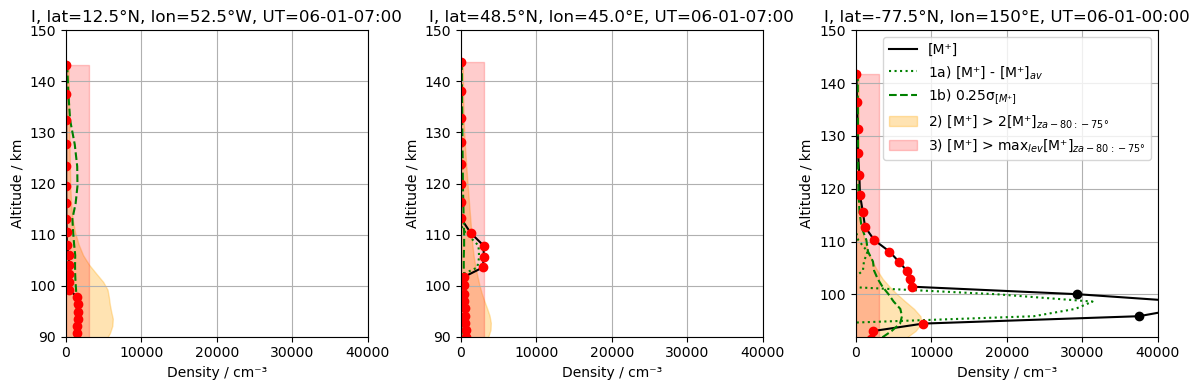

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# First subplot ==============================================================================

axes[1].plot(Mptdensns_sel2_cli, alt_sel2_cli, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel2_cli - Mptdens_nsavg_sel2_cli), alt_sel2_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25 * Mptdens_nsstd_sel2_cli, alt_sel2_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel2_cli, 0, 2 * Mptdens_sel2_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_cli.values - 2.5)}:{int(intlat_sel2_cli.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel2_cli)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel2_cli, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_cli.values - 2.5)}:{int(intlat_sel2_cli.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel2_cli) - 1):
    if Mptdens_nsdiff_sel2_cli[i] < 0.25 * Mptdens_nsstd_sel2_cli[i] or Mptdensns_sel2_cli[i] < max_Mptdens_sel or Mptdensns_sel2_cli[i] < 2 * Mptdens_sel2_cli[i]:
        axes[1].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel2_cli[i], alt_sel2_cli[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')
axes[1].set_ylabel('Altitude / km')
axes[1].grid(True)
axes[1].set_title('I, lat=48.5\u00b0N, lon=45.0\u00b0E, UT=06-01-07:00')

# Second subplot =============================================================================

axes[0].plot(Mptdensns_sel1_cli, alt_sel1_cli, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel1_cli - Mptdens_nsavg_sel1_cli), alt_sel1_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25 * Mptdens_nsstd_sel1_cli, alt_sel1_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel1_cli, 0, 2 * Mptdens_sel1_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_cli.values - 2.5)}:{int(intlat_sel1_cli.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel1_cli)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel1_cli, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_cli.values - 2.5)}:{int(intlat_sel1_cli.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel1_cli) - 1):
    if Mptdens_nsdiff_sel1_cli[i] < 0.25 * Mptdens_nsstd_sel1_cli[i] or Mptdensns_sel1_cli[i] < max_Mptdens_sel or Mptdensns_sel1_cli[i] < 2 * Mptdens_sel1_cli[i]:
        axes[0].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel1_cli[i], alt_sel1_cli[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')
axes[0].set_ylabel('Altitude / km')
axes[0].grid(True)
axes[0].set_title('I, lat=12.5\u00b0N, lon=52.5\u00b0W, UT=06-01-07:00')

# Third subplot =============================================================================

axes[2].plot(Mptdensns_sel3_cli, alt_sel3_cli, label='[M\u207A]', color='black')
axes[2].plot((Mptdensns_sel3_cli - Mptdens_nsavg_sel3_cli), alt_sel3_cli, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[2].plot(0.25 * Mptdens_nsstd_sel3_cli, alt_sel3_cli, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[2].set_ylim(92, WACCM_UL)
axes[2].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[2].fill_betweenx(alt_sel3_cli, 0, 2 * Mptdens_sel3_cli, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel3_cli.values - 2.5)}:{int(intlat_sel3_cli.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_cli = np.max(Mptdens_sel3_cli)

# Add a vertical line at the maximum value
axes[2].fill_betweenx(alt_sel3_cli, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel3_cli.values - 2.5)}:{int(intlat_sel3_cli.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel3_cli) - 1):
    if Mptdens_nsdiff_sel3_cli[i] < 0.25 * Mptdens_nsstd_sel3_cli[i] or Mptdensns_sel3_cli[i] < max_Mptdens_sel or Mptdensns_sel3_cli[i] < 2 * Mptdens_sel3_cli[i]:
        axes[2].plot(Mptdensns_sel3_cli[i], alt_sel3_cli[i], 'ro')  # Plot red circles
    else:
        axes[2].plot(Mptdensns_sel3_cli[i], alt_sel3_cli[i], 'ko')  # Plot black circles

axes[2].set_xlabel('Density / cm\u207B\u00B3')
axes[2].set_ylabel('Altitude / km')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('I, lat=-77.5\u00b0N, lon=150\u00b0E, UT=06-01-00:00')
# ============================================================================================
plt.tight_layout()

figname = f'Climate_Change_Criteria_eg_Lat_{int(intlat_sel2_cli.values - 2.5)}-{int(intlat_sel2_cli.values + 2.5)}_and_{int(intlat_sel1_cli.values - 2.5)}-{int(intlat_sel1_cli.values + 2.5)}_and_{int(intlat_sel3_cli.values - 2.5)}-{int(intlat_sel3_cli.values + 2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Solar max detection criteria plot 

In [87]:
lev_sl_Smax = ds_sum_Smax.variables['lev_sl']
lat_Smax = ds_sum_Smax.variables['lat']
intlat_Smax = ds_sum_Smax.variables['latsl']
lon_Smax = ds_sum_Smax.variables['lon']
LT_Smax = ds_sum_Smax.variables['LT']
LT_L_Smax = ds_sum_Smax.variables['LT_L']

Zavg_sl_Smax = ds_sum_Smax.variables['Zavg_sl']
times_str_min_Smax = ds_sum_Smax.variables['times_str_min']
times_str_max_Smax = ds_sum_Smax.variables['times_str_max']

SpEs_Smax = ds_sum_Smax['SpEs'] #(19, 336, 96, 144, 2, 3)
Mptdens_sh_Smax = ds_sum_Smax['Mptdens_sh']

SpEsns_Smax = ds_sum_Smax['SpEsns']
Mptdensns_Smax = ds_sum_Smax['Mptdensns']

Mptdens_nsavg_Smax = ds_sum_Smax['Mptdens_nsavg'] #'lev_sl', 'lat', 'lon', 'timesl', 'mth'
Mptdens_nsstd_Smax = ds_sum_Smax['Mptdens_nsstd'] #('lev_sl', 'lat', 'lon', 'timesl', 'mth')
Mptdens_nsdiff_Smax = ds_sum_Smax['Mptdens_nsdiff'] #('lev_sl', 'time', 'lat', 'lon', 'timesl', 'mth')

#Locations
Mptdens_nsavg_sl_Smax = Mptdens_nsavg_Smax[:,:,:,0,0]
Mptdens_nsavg_sel1_Smax = Mptdens_nsavg_sl_Smax.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsavg_sel2_Smax = Mptdens_nsavg_sl_Smax.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsavg_sel3_Smax = Mptdens_nsavg_sl_Smax.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdensns_sl_Smax = Mptdensns_Smax[:,7,:,:,0,0] #Choose UT & first timeslice
Mptdensns_sel1_Smax = Mptdensns_sl_Smax.sel(lat=12.5, lon=307.5, method='nearest')
Mptdensns_sel2_Smax = Mptdensns_sl_Smax.sel(lat=48.5, lon=45.0, method='nearest')

Mptdensns_sel3_Smax = Mptdensns_Smax[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsstd_sl_Smax = Mptdens_nsstd_Smax[:,:,:,0,0] #select first timeslice
Mptdens_nsstd_sel1_Smax = Mptdens_nsstd_sl_Smax.sel(lat=12.5, lon=307.5, method='nearest')  
Mptdens_nsstd_sel2_Smax = Mptdens_nsstd_sl_Smax.sel(lat=48.5, lon=45.0, method='nearest')
Mptdens_nsstd_sel3_Smax = Mptdens_nsstd_sl_Smax.sel(lat=-77.5, lon=150.0, method='nearest')


Mptdens_nsdiff_sl_Smax = Mptdens_nsdiff_Smax[:,7,:,:,0,0] #Choose UT      #->('lev_sl', 'lat', 'lon')
Mptdens_nsdiff_sel1_Smax = Mptdens_nsdiff_sl_Smax.sel(lat=12.5, lon=307.5, method='nearest')
Mptdens_nsdiff_sel2_Smax = Mptdens_nsdiff_sl_Smax.sel(lat=48.5, lon=45.0, method='nearest')

Mptdens_nsdiff_sel3_Smax = Mptdens_nsdiff_Smax[:,0,:,:,0,0].sel(lat=-77.5, lon=150.0, method='nearest')

In [89]:
#zonal averages

#-75-80' location
ind = 2
intlat_sel3_Smax = intlat_Smax[ind]
print(intlat_sel3_Smax.values)
alt_sel3_Smax = sum_alt_sl_sh_avg_bb_5d_dsavgg_Smax[:,ind]
Mptdens_sel3_Smax = sum_Mptdens_avv1_b_5d_Smax[:,ind,0,0]


#10-15' location
ind = 20
intlat_sel1_Smax = intlat_Smax[ind]
print(intlat_sel1_Smax.values)
alt_sel1_Smax = sum_alt_sl_sh_avg_bb_5d_dsavgg_Smax[:,ind]
Mptdens_sel1_Smax = sum_Mptdens_avv1_b_5d_Smax[:,ind,0,0]


#45-50' location
ind = 27
intlat_sel2_Smax = intlat_Smax[ind]
print(intlat_sel2_Smax.values)
alt_sel2_Smax = sum_alt_sl_sh_avg_bb_5d_dsavgg_Smax[:,ind]
Mptdens_sel2_Smax = sum_Mptdens_avv1_b_5d_Smax[:,ind,0,0]


-77.5
12.5
47.5


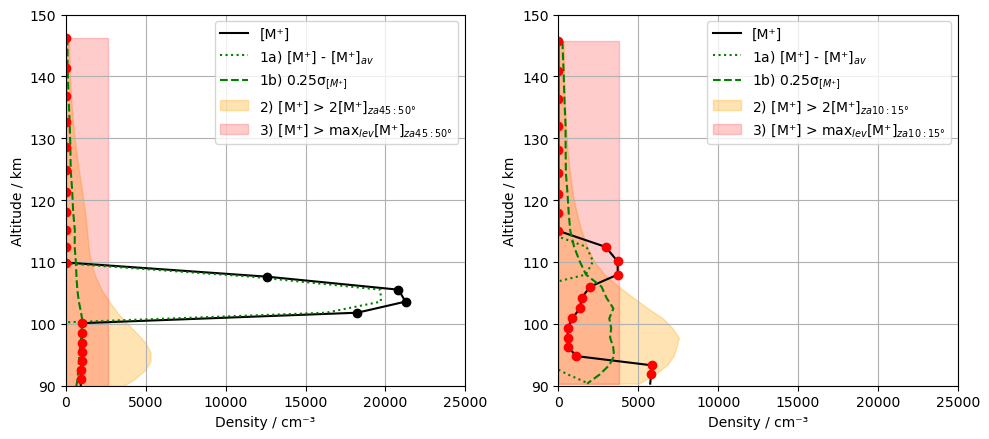

In [90]:

# Plotting code for the first subplot, 45-50' location 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.5))

# First subplot ==============================================================================

axes[0].plot(Mptdensns_sel2_Smax, alt_sel2_Smax, label='[M\u207A]', color='black')

axes[0].plot((Mptdensns_sel2_Smax-Mptdens_nsavg_sel2_Smax), alt_sel2_Smax, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[0].plot(0.25*Mptdens_nsstd_sel2_Smax, alt_sel2_Smax, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')


axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel2_Smax, 0, 2 * Mptdens_sel2_Smax, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_Smax.values-2.5)}:{int(intlat_sel2_Smax.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smax = np.max(Mptdens_sel2_Smax)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel2_Smax, 0, max_Mptdens_sel_Smax, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_Smax.values-2.5)}:{int(intlat_sel2_Smax.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel2_Smax) - 1):
    if Mptdens_nsdiff_sel2_Smax[i] < 0.25*Mptdens_nsstd_sel2_Smax[i] or Mptdensns_sel2_Smax[i] < max_Mptdens_sel_Smax or Mptdensns_sel2_Smax[i] < 2 * Mptdens_sel2_Smax[i]:
        axes[0].plot(Mptdensns_sel2_Smax[i], alt_sel2_Smax[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel2_Smax[i], alt_sel2_Smax[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')  
axes[0].set_ylabel('Altitude / km')
axes[0].legend()
axes[0].grid(True)

# Second subplot, 10-15' location =============================================================================

axes[1].plot(Mptdensns_sel1_Smax, alt_sel1_Smax, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel1_Smax-Mptdens_nsavg_sel1_Smax), alt_sel1_Smax, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')

axes[1].plot(0.25*Mptdens_nsstd_sel1_Smax, alt_sel1_Smax, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 25000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel1_Smax, 0, 2 * Mptdens_sel1_Smax, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_Smax.values-2.5)}:{int(intlat_sel1_Smax.values+2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smax = np.max(Mptdens_sel1_Smax)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel1_Smax, 0, max_Mptdens_sel_Smax, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_Smax.values-2.5)}:{int(intlat_sel1_Smax.values+2.5)}\u00B0}}$')

for i in range(len(alt_sel1_Smax) - 1):
    if Mptdens_nsdiff_sel1_Smax[i] < 0.25*Mptdens_nsstd_sel1_Smax[i] or Mptdensns_sel1_Smax[i] < max_Mptdens_sel_Smax or Mptdensns_sel1_Smax[i] < 2 * Mptdens_sel1_Smax[i]:
        axes[1].plot(Mptdensns_sel1_Smax[i], alt_sel1_Smax[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel1_Smax[i], alt_sel1_Smax[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')  
axes[1].set_ylabel('Altitude / km')

axes[1].legend()
axes[1].grid(True)


# ============================================================================================
plt.tight_layout()

figname = f'Smax_Criteria_eg_Lat_{int(intlat_sel2_Smax.values-2.5)}-{int(intlat_sel2_Smax.values+2.5)}_and_{int(intlat_sel1_Smax.values-2.5)}-{int(intlat_sel1_Smax.values+2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

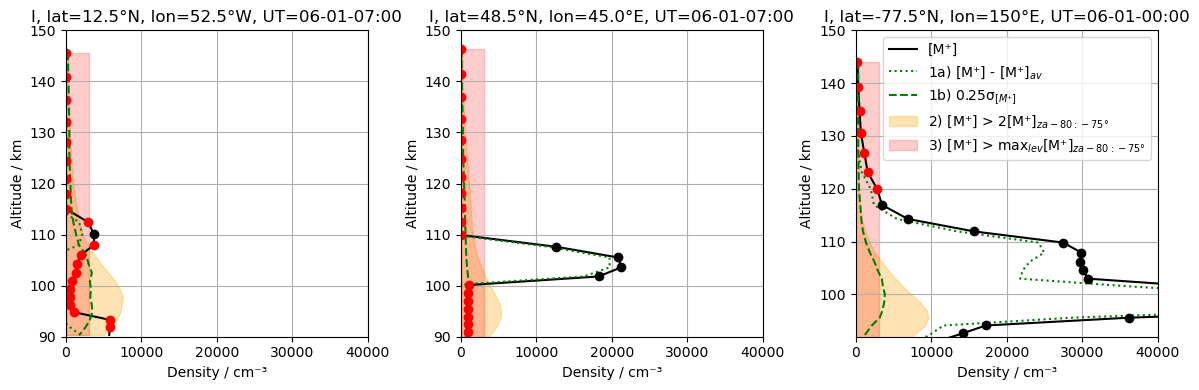

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# First subplot ==============================================================================

axes[1].plot(Mptdensns_sel2_Smax, alt_sel2_Smax, label='[M\u207A]', color='black')
axes[1].plot((Mptdensns_sel2_Smax - Mptdens_nsavg_sel2_Smax), alt_sel2_Smax, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[1].plot(0.25 * Mptdens_nsstd_sel2_Smax, alt_sel2_Smax, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[1].set_ylim(90, WACCM_UL)
axes[1].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[1].fill_betweenx(alt_sel2_Smax, 0, 2 * Mptdens_sel2_Smax, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel2_Smax.values - 2.5)}:{int(intlat_sel2_Smax.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smax = np.max(Mptdens_sel2_Smax)

# Add a vertical line at the maximum value
axes[1].fill_betweenx(alt_sel2_Smax, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel2_Smax.values - 2.5)}:{int(intlat_sel2_Smax.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel2_Smax) - 1):
    if Mptdens_nsdiff_sel2_Smax[i] < 0.25 * Mptdens_nsstd_sel2_Smax[i] or Mptdensns_sel2_Smax[i] < max_Mptdens_sel or Mptdensns_sel2_Smax[i] < 2 * Mptdens_sel2_Smax[i]:
        axes[1].plot(Mptdensns_sel2_Smax[i], alt_sel2_Smax[i], 'ro')  # Plot red circles
    else:
        axes[1].plot(Mptdensns_sel2_Smax[i], alt_sel2_Smax[i], 'ko')  # Plot black circles

axes[1].set_xlabel('Density / cm\u207B\u00B3')
axes[1].set_ylabel('Altitude / km')
axes[1].grid(True)
axes[1].set_title('I, lat=48.5\u00b0N, lon=45.0\u00b0E, UT=06-01-07:00')

# Second subplot =============================================================================

axes[0].plot(Mptdensns_sel1_Smax, alt_sel1_Smax, label='[M\u207A]', color='black')
axes[0].plot((Mptdensns_sel1_Smax - Mptdens_nsavg_sel1_Smax), alt_sel1_Smax, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[0].plot(0.25 * Mptdens_nsstd_sel1_Smax, alt_sel1_Smax, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[0].set_ylim(90, WACCM_UL)
axes[0].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[0].fill_betweenx(alt_sel1_Smax, 0, 2 * Mptdens_sel1_Smax, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel1_Smax.values - 2.5)}:{int(intlat_sel1_Smax.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smax = np.max(Mptdens_sel1_Smax)

# Add a vertical line at the maximum value
axes[0].fill_betweenx(alt_sel1_Smax, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel1_Smax.values - 2.5)}:{int(intlat_sel1_Smax.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel1_Smax) - 1):
    if Mptdens_nsdiff_sel1_Smax[i] < 0.25 * Mptdens_nsstd_sel1_Smax[i] or Mptdensns_sel1_Smax[i] < max_Mptdens_sel or Mptdensns_sel1_Smax[i] < 2 * Mptdens_sel1_Smax[i]:
        axes[0].plot(Mptdensns_sel1_Smax[i], alt_sel1_Smax[i], 'ro')  # Plot red circles
    else:
        axes[0].plot(Mptdensns_sel1_Smax[i], alt_sel1_Smax[i], 'ko')  # Plot black circles

axes[0].set_xlabel('Density / cm\u207B\u00B3')
axes[0].set_ylabel('Altitude / km')
axes[0].grid(True)
axes[0].set_title('I, lat=12.5\u00b0N, lon=52.5\u00b0W, UT=06-01-07:00')

# Third subplot =============================================================================

axes[2].plot(Mptdensns_sel3_Smax, alt_sel3_Smax, label='[M\u207A]', color='black')
axes[2].plot((Mptdensns_sel3_Smax - Mptdens_nsavg_sel3_Smax), alt_sel3_Smax, color='green', linestyle='dotted', label='1a) [M\u207A] - [M\u207A]$_{av}$')
axes[2].plot(0.25 * Mptdens_nsstd_sel3_Smax, alt_sel3_Smax, color='green', linestyle='dashed', label='1b) 0.25\u03C3$_{[M\u207A]}$')

axes[2].set_ylim(92, WACCM_UL)
axes[2].set_xlim(0, 40000)

# Shading under the line 3 * Mptdens_sel
axes[2].fill_betweenx(alt_sel3_Smax, 0, 2 * Mptdens_sel3_Smax, color='orange', alpha=0.3, label=f'2) [M\u207A] > 2[M\u207A]$_{{za {int(intlat_sel3_Smax.values - 2.5)}:{int(intlat_sel3_Smax.values + 2.5)}\u00B0}}$')

# Calculate maximum of Mptdens_sel over altitude
max_Mptdens_sel_Smax = np.max(Mptdens_sel3_Smax)

# Add a vertical line at the maximum value
axes[2].fill_betweenx(alt_sel3_Smax, 0, max_Mptdens_sel, color='red', alpha=0.2, label=f'3) [M\u207A] > max$_{{lev}}$[M\u207A]$_{{za {int(intlat_sel3_Smax.values - 2.5)}:{int(intlat_sel3_Smax.values + 2.5)}\u00B0}}$')

for i in range(len(alt_sel3_Smax) - 1):
    if Mptdens_nsdiff_sel3_Smax[i] < 0.25 * Mptdens_nsstd_sel3_Smax[i] or Mptdensns_sel3_Smax[i] < max_Mptdens_sel or Mptdensns_sel3_Smax[i] < 2 * Mptdens_sel3_Smax[i]:
        axes[2].plot(Mptdensns_sel3_Smax[i], alt_sel3_Smax[i], 'ro')  # Plot red circles
    else:
        axes[2].plot(Mptdensns_sel3_Smax[i], alt_sel3_Smax[i], 'ko')  # Plot black circles

axes[2].set_xlabel('Density / cm\u207B\u00B3')
axes[2].set_ylabel('Altitude / km')
axes[2].legend()
axes[2].grid(True)
axes[2].set_title('I, lat=-77.5\u00b0N, lon=150\u00b0E, UT=06-01-00:00')
# ============================================================================================
plt.tight_layout()

figname = f'Smax_Criteria_eg_Lat_{int(intlat_sel2_Smax.values - 2.5)}-{int(intlat_sel2_Smax.values + 2.5)}_and_{int(intlat_sel1_Smax.values - 2.5)}-{int(intlat_sel1_Smax.values + 2.5)}_and_{int(intlat_sel3_Smax.values - 2.5)}-{int(intlat_sel3_Smax.values + 2.5)}.png'
plt.savefig(f'Comparison_figs/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat line plots

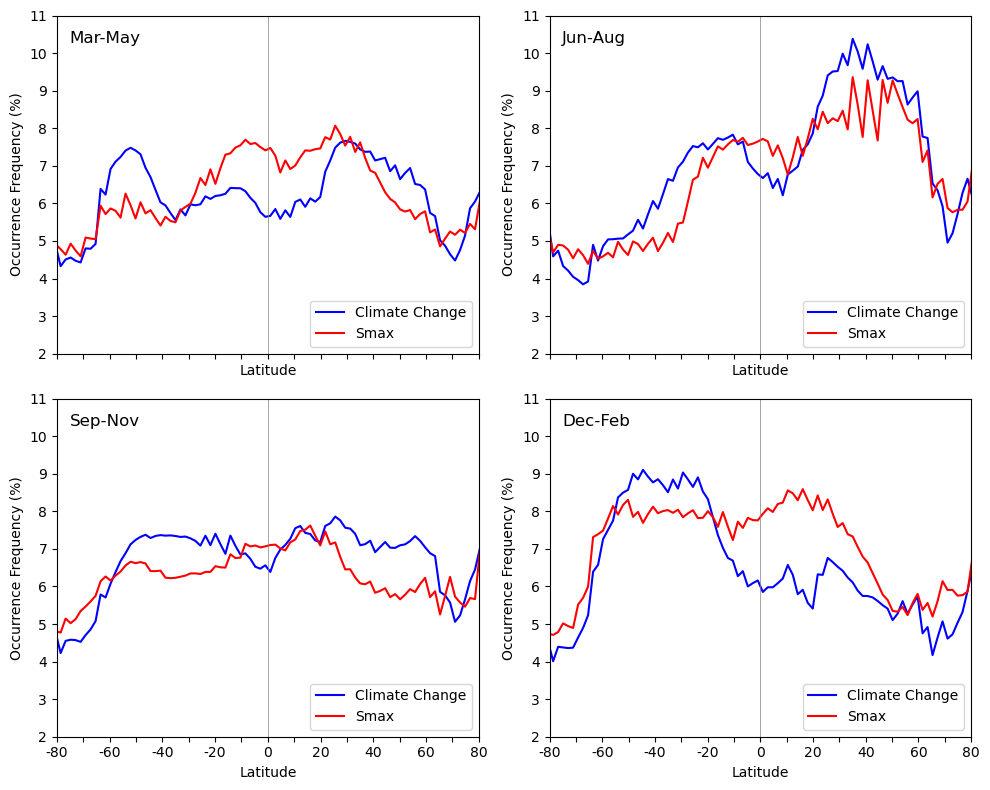

In [92]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot Cli Change
axes[0, 0].plot(lat, spr_SpEsns_Occ_Freq_lat_cli , color='blue', linestyle='solid', label='Climate Change')
axes[0, 1].plot(lat, sum_SpEsns_Occ_Freq_lat_cli , color='blue', linestyle='solid', label='Climate Change')
axes[1, 0].plot(lat, aut_SpEsns_Occ_Freq_lat_cli , color='blue', linestyle='solid', label='Climate Change')
axes[1, 1].plot(lat, win_SpEsns_Occ_Freq_lat_cli , color='blue', linestyle='solid', label='Climate Change')

# Plot Smax
axes[0, 0].plot(lat, spr_SpEsns_Occ_Freq_lat_Smax , color='red', linestyle='solid', label='Smax')
axes[0, 1].plot(lat, sum_SpEsns_Occ_Freq_lat_Smax , color='red', linestyle='solid', label='Smax')
axes[1, 0].plot(lat, aut_SpEsns_Occ_Freq_lat_Smax , color='red', linestyle='solid', label='Smax')
axes[1, 1].plot(lat, win_SpEsns_Occ_Freq_lat_Smax , color='red', linestyle='solid', label='Smax')



ylim_min = 2
ylim_max = 11

nmeas_lim = 25
        
for ax in axes.flatten():
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)

    ax.legend()
    ax.set_ylim(ylim_min, ylim_max)

for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        label = ['Mar-May', 'Jun-Aug', 'Sep-Nov','Dec-Feb'][i * 2 + j]
        ax.text(0.03, 0.92, label, transform=ax.transAxes, fontsize=12)

axes[0, 0].legend(loc='lower right')
axes[0, 1].legend(loc='lower right')
axes[1, 0].legend(loc='lower right')
axes[1, 1].legend(loc='lower right')
        
plt.tight_layout()

# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_Lat_5d_f-{factor}.png'
# else:
#     figname = f'{run_name}_Daviddata_Lat_f-{factor}.png'
    
#plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()


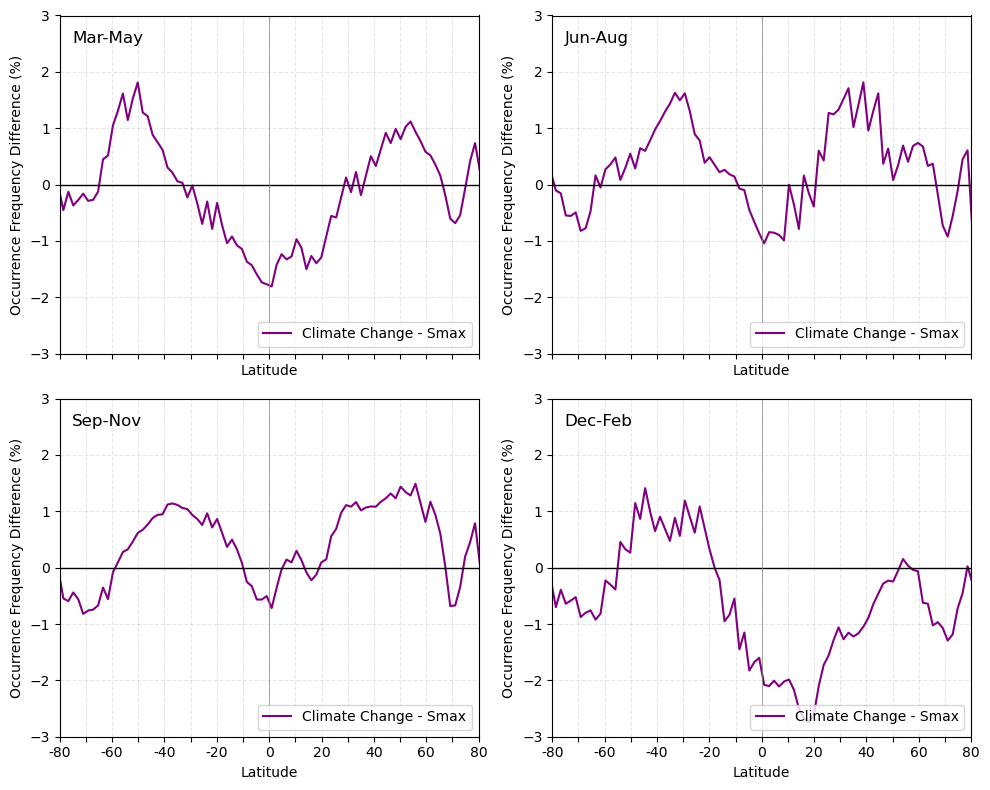

In [93]:
spr_diff = spr_SpEsns_Occ_Freq_lat_cli - spr_SpEsns_Occ_Freq_lat_Smax
sum_diff = sum_SpEsns_Occ_Freq_lat_cli - sum_SpEsns_Occ_Freq_lat_Smax
aut_diff = aut_SpEsns_Occ_Freq_lat_cli - aut_SpEsns_Occ_Freq_lat_Smax
win_diff = win_SpEsns_Occ_Freq_lat_cli - win_SpEsns_Occ_Freq_lat_Smax

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True)

# Plot differences
axes[0, 0].plot(lat, spr_diff, color='purple', linestyle='solid', label='Climate Change - Smax')
axes[0, 1].plot(lat, sum_diff, color='purple', linestyle='solid', label='Climate Change - Smax')
axes[1, 0].plot(lat, aut_diff, color='purple', linestyle='solid', label='Climate Change - Smax')
axes[1, 1].plot(lat, win_diff, color='purple', linestyle='solid', label='Climate Change - Smax')

ylim_min_diff = -3  
ylim_max_diff = 3

# Add zero line and formatting
for ax in axes.flatten():
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.0)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    ax.set_xlim(-80, 80)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Occurrence Frequency Difference (%)')
    
    xticks = np.arange(-80, 81, 10)
    xticklabels = ['' if i % 2 != 0 else str(tick) for i, tick in enumerate(xticks)]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.legend()
    ax.set_ylim(ylim_min_diff, ylim_max_diff)
    ax.grid(True, linestyle='--', alpha=0.3)

# Add season labels
season_labels = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']
for i in range(2):
    for j in range(2):
        idx = i * 2 + j
        axes[i, j].text(0.03, 0.92, season_labels[idx], transform=axes[i, j].transAxes, fontsize=12)

for i in range(2):
    for j in range(2):
        axes[i, j].legend(loc='lower right')
        
plt.tight_layout()
plt.show()

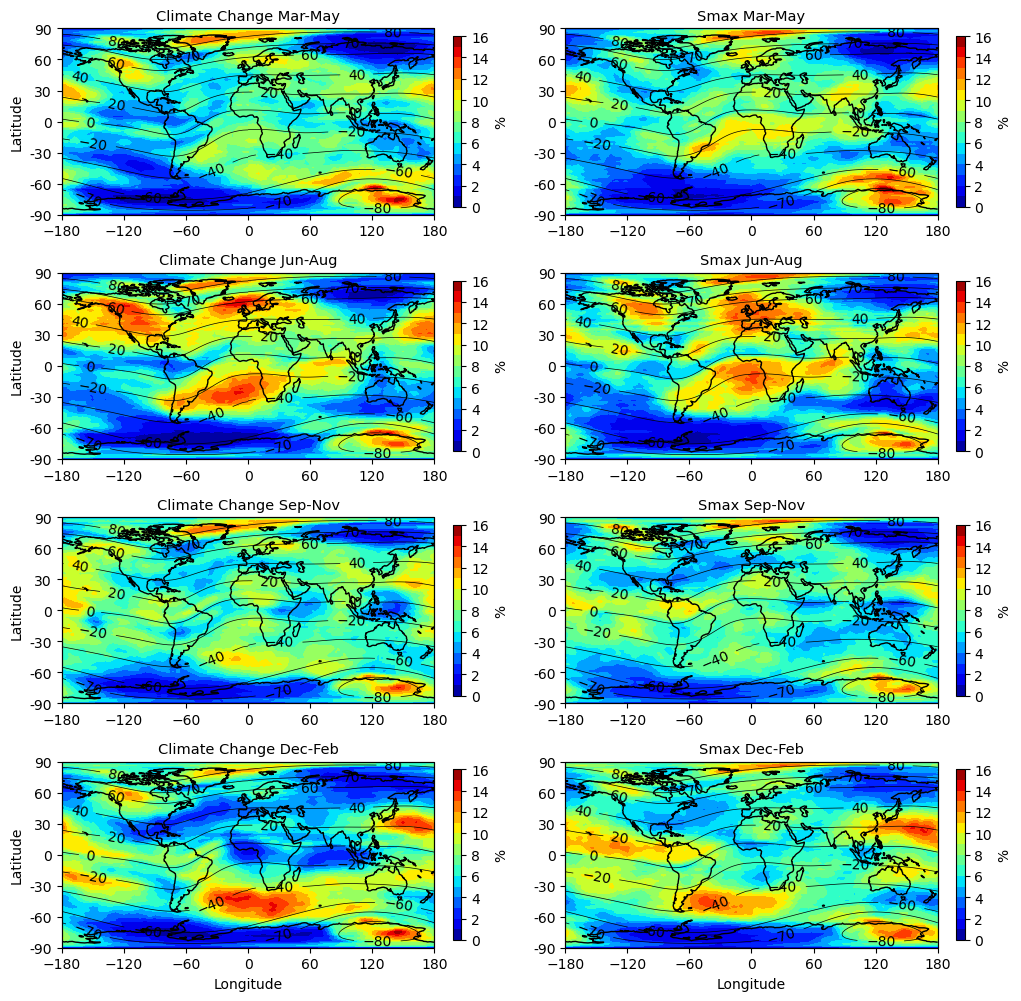

In [94]:
lon_plot = lon.values
lon_plot[-1] = 360.


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 11),
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

cmap = plt.get_cmap('jet')

subplots_cli = [spr_SpEsns_Occ_Freq_llav_cli , sum_SpEsns_Occ_Freq_llav_cli
                  , aut_SpEsns_Occ_Freq_llav_cli, win_SpEsns_Occ_Freq_llav_cli]

titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin_cli = 0
vmax_cli = 16
nolevs_cli = (vmax_cli-vmin_cli) +1

for i, data in enumerate(subplots_cli):
    row_cli = i
    col_cli = 0
    
    ax_cli = axes[i, 0]

    C = ax_cli.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                         )

    
    if row_cli == 3:
        ax_cli.set_xlabel('Longitude')
    if col_cli == 0:
        ax_cli.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
 
    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        


    
    cbar = fig.colorbar(C, ax=ax_cli, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_cli.coastlines() 

    ax2 = fig.add_subplot(axes[i, 0].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(lon, lat, ALATM_cli[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels,# vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10)
    ax2.set_title(f'Climate Change {titles_cli[i]}', fontsize=10.5)

subplots_Smax = [spr_SpEsns_Occ_Freq_llav_Smax , sum_SpEsns_Occ_Freq_llav_Smax
                  , aut_SpEsns_Occ_Freq_llav_Smax, win_SpEsns_Occ_Freq_llav_Smax]

titles_Smax = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

vmin_Smax = 0
vmax_Smax = 16
nolevs_Smax = (vmax_Smax-vmin_Smax) +1

for i, data in enumerate(subplots_Smax):
    ax_Smax = axes[i, 1]
    

    C = ax_Smax.contourf(lon_plot, lat, data, cmap=cmap,
                    levels=np.linspace(vmin_Smax, vmax_Smax, nolevs_Smax), vmin=vmin_Smax, vmax=vmax_Smax
                         )

    ax_Smax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    if i == 3:
        ax_Smax.set_xlabel('Longitude')

    ax_Smax.set_yticks(np.linspace(-90, 90, 7))


    cbar = fig.colorbar(C, ax=ax_Smax, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 

    ax_Smax.coastlines() 

    ax2_Smax = fig.add_subplot(axes[i, 1].get_subplotspec(), projection=ccrs.PlateCarree())

    ax2_Smax.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2_Smax.contour(lon, lat, ALATM_Smax[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )

    ax2_Smax.patch.set_facecolor('none')
    clabels = ax2_Smax.clabel(contour, inline=True, fontsize=10)
    ax2_Smax.set_title(f'Smax {titles_Smax[i]}', fontsize=10.5)


plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_LatLon_5d_f-{factor}.png'
# else:
#     figname = f'{run_name}_Daviddata_LatLon_f-{factor}.png'
    
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT all levels

IndexError: index 2 is out of bounds for axis 0 with size 2

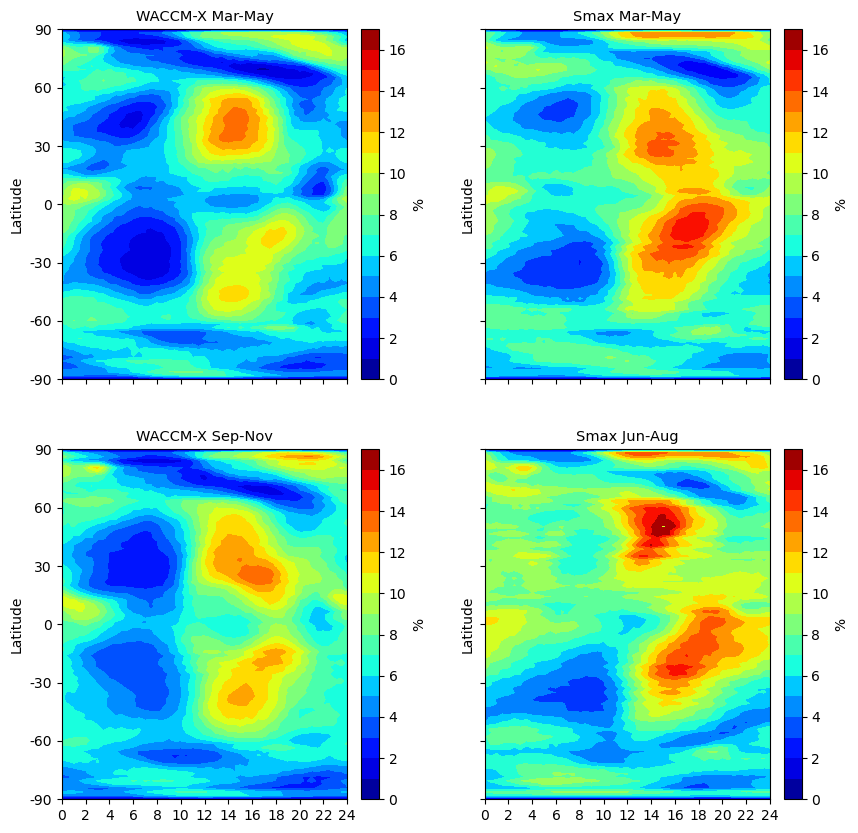

In [95]:
# Lat - LT - all levs

 #Whole Dataset avg over all heights (96, 48) lat,LT
win_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((win_SpEs_Occ_Freq_llbav_cli, win_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)
spr_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((spr_SpEs_Occ_Freq_llbav_cli, spr_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)
sum_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((sum_SpEs_Occ_Freq_llbav_cli, sum_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)
aut_SpEs_Occ_Freq_llbav_plot_cli = np.concatenate((aut_SpEs_Occ_Freq_llbav_cli, aut_SpEs_Occ_Freq_llbav_cli[:, :1]), axis=1)

win_SpEs_Occ_Freq_llbav_plot_Smax = np.concatenate((win_SpEs_Occ_Freq_llbav_Smax, win_SpEs_Occ_Freq_llbav_Smax[:, :1]), axis=1)
spr_SpEs_Occ_Freq_llbav_plot_Smax = np.concatenate((spr_SpEs_Occ_Freq_llbav_Smax, spr_SpEs_Occ_Freq_llbav_Smax[:, :1]), axis=1)
sum_SpEs_Occ_Freq_llbav_plot_Smax = np.concatenate((sum_SpEs_Occ_Freq_llbav_Smax, sum_SpEs_Occ_Freq_llbav_Smax[:, :1]), axis=1)
aut_SpEs_Occ_Freq_llbav_plot_Smax = np.concatenate((aut_SpEs_Occ_Freq_llbav_Smax, aut_SpEs_Occ_Freq_llbav_Smax[:, :1]), axis=1)


fig_combined, axes_combined = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                                           sharex=True, sharey=True)

vmin_Smax = 0
vmax_Smax = 14
nolevs_Smax = (vmax_Smax - vmin_Smax ) +1
cmap_Smax = plt.get_cmap('jet')

vmin_cli = 0
vmax_cli = 17
nolevs_cli = (vmax_cli - vmin_cli ) +1
cmap_cli = plt.get_cmap('jet')


subplots_cli = [spr_SpEs_Occ_Freq_llbav_plot_cli, sum_SpEs_Occ_Freq_llbav_plot_cli,
                  aut_SpEs_Occ_Freq_llbav_plot_cli, win_SpEs_Occ_Freq_llbav_plot_cli]

titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data_cli in enumerate(subplots_cli):
    row_cli = i // 2
    col_cli = i % 2
    ax_cli = axes_combined[row_cli, col_cli]

    C_cli = ax_cli.contourf(timeplot, lat, data_cli, cmap=jet,
                                levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),
                                vmin=vmin_cli, vmax=vmax_cli
                               )

    if row_cli == 2:
        ax_cli.set_xlabel('Local Time / hrs')
    if col_cli == 0:
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))  
    
    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    ax_cli.set_title(f'WACCM-X {titles_cli[i]}', fontsize=10.5)


    cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)#, shrink=0.8)
    cbar_cli.set_label(r'%')

    
    
subplots_Smax = [spr_SpEs_Occ_Freq_llbav_plot_Smax, sum_SpEs_Occ_Freq_llbav_plot_Smax,
                  aut_SpEs_Occ_Freq_llbav_plot_Smax, win_SpEs_Occ_Freq_llbav_plot_Smax]

titles_Smax = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smax in enumerate(subplots_Smax):
    row_Smax = i
    col_Smax = 1
    ax_Smax = axes_combined[row_Smax, col_Smax]

    C_Smax = ax_Smax.contourf(timeplot, lat, data_Smax, cmap=jet,
                                levels=np.linspace(vmin_Smax, vmax_Smax, nolevs_Smax),
                                vmin=vmin_Smax, vmax=vmax_Smax
                               )

    if col_Smax == 0:
        ax_Smax.set_ylabel('Latitude')
    ax_Smax.set_yticks(np.linspace(-90, 90, 7))
    ax_Smax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))   
    
    if row_Smax == 3:
        ax_Smax.set_xlabel('Local Time / hrs')
    xticks_Smax = np.linspace(0, 24, 13)
    ax_Smax.set_xticks(xticks_Smax)
    ax_Smax.set_xticklabels(xticks_Smax.astype(int))
    
    ax_Smax.set_title(f'Smax {titles_Smax[i]}', fontsize=10.5)

    # cbar_Smax = fig_combined.colorbar(C_Smax, ax=ax_Smax, pad=0.04)#, shrink=0.8)
    cbar_Smax.set_label(r'%')

plt.tight_layout()


# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_LatLT_5d_f-{factor}.png'
# else:
#     figname = f'{run_name}_Daviddata_LatLT_f-{factor}.png'
    
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')


plt.show()

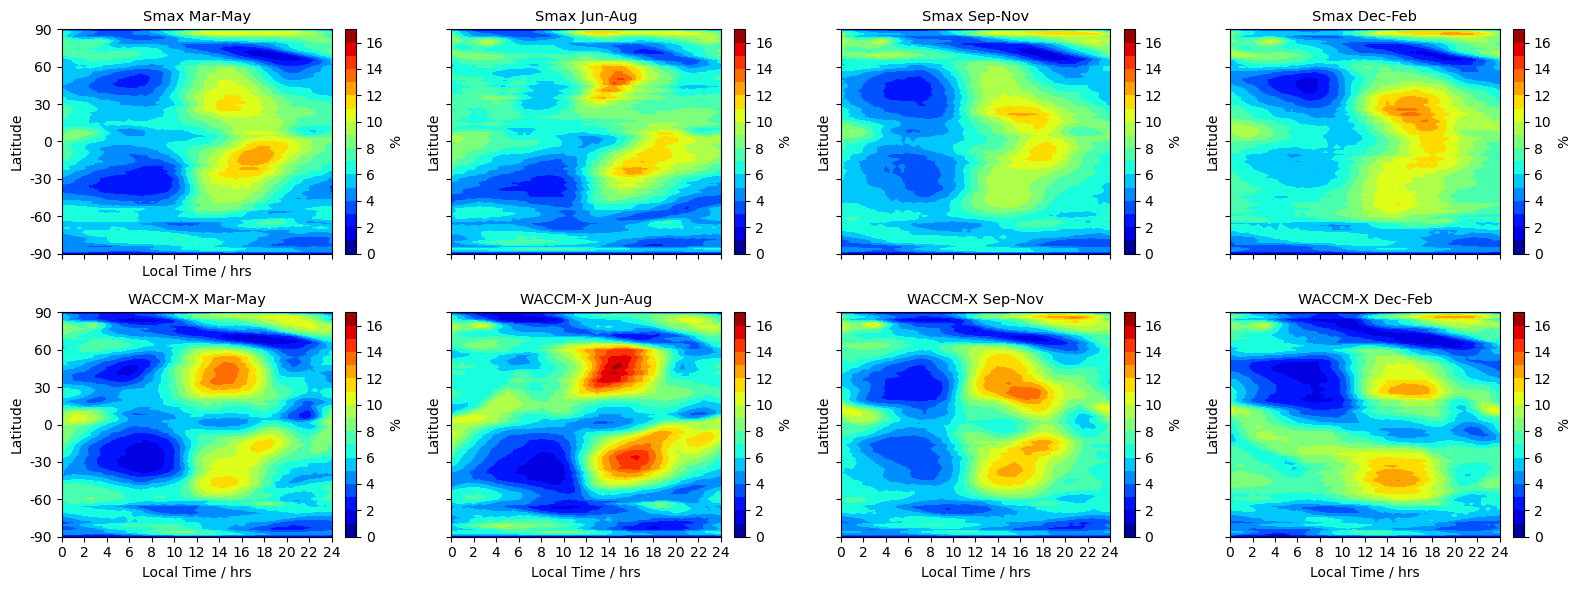

In [96]:
# Latitude - Local Time Plots
# Landscape 

fig_combined, axes_combined = plt.subplots(nrows=2, ncols=4, figsize=(16, 6),
                                           sharex=True, sharey=True)

vmin_Smax = 0
vmax_Smax = 17
nolevs_Smax = (vmax_Smax - vmin_Smax) + 1
cmap_Smax = plt.get_cmap('jet')

vmin_cli = 0
vmax_cli = 17
nolevs_cli = (vmax_cli - vmin_cli) + 1
cmap_cli = plt.get_cmap('jet')

subplots_Smax = [spr_SpEs_Occ_Freq_llbav_plot_Smax, sum_SpEs_Occ_Freq_llbav_plot_Smax,
                  aut_SpEs_Occ_Freq_llbav_plot_Smax, win_SpEs_Occ_Freq_llbav_plot_Smax]

titles_Smax = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smax in enumerate(subplots_Smax):
    row_Smax = 0
    col_Smax = i
    ax_Smax = axes_combined[row_Smax, col_Smax]

    C_Smax = ax_Smax.contourf(timeplot, lat, data_Smax, cmap=jet,
                            levels=np.linspace(vmin_Smax, vmax_Smax, nolevs_Smax),
                            vmin=vmin_Smax, vmax=vmax_Smax
                           )

    if row_Smax == 0:
        ax_Smax.set_ylabel('Latitude')
    ax_Smax.set_yticks(np.linspace(-90, 90, 7))
    ax_Smax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

    if col_Smax == 0:
        ax_Smax.set_xlabel('Local Time / hrs')
    xticks_Smax = np.linspace(0, 24, 13)
    ax_Smax.set_xticks(xticks_Smax)
    ax_Smax.set_xticklabels(xticks_Smax.astype(int))

    ax_Smax.set_title(f'Smax {titles_Smax[i]}', fontsize=10.5)

    cbar_Smax = fig_combined.colorbar(C_Smax, ax=ax_Smax, pad=0.04)  # , shrink=0.8)
    cbar_Smax.set_label(r'%')

    
    

subplots_cli = [spr_SpEs_Occ_Freq_llbav_plot_cli, sum_SpEs_Occ_Freq_llbav_plot_cli,
                  aut_SpEs_Occ_Freq_llbav_plot_cli, win_SpEs_Occ_Freq_llbav_plot_cli]

titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    row_cli = 1
    col_cli = i
    ax_cli = axes_combined[row_cli, col_cli]

    C_cli = ax_cli.contourf(timeplot, lat, data_cli, cmap=jet,
                                 levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),
                                 vmin=vmin_cli, vmax=vmax_cli
                                 )

    if row_cli == 1:
        ax_cli.set_xlabel('Local Time / hrs')
    if col_cli == 0:
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))

    ax_cli.set_ylabel('Latitude')
    ax_cli.set_yticks(np.linspace(-90, 90, 7))
    ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

    ax_cli.set_title(f'WACCM-X {titles_cli[i]}', fontsize=10.5)

    cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)  # , shrink=0.8)
    cbar_cli.set_label(r'%')

plt.tight_layout()  

# figname = None
# if fivedegbins == 1:
#     figname = f'{run_name}_Daviddata_LatLT_5d_f-{factor}_landscape.png'
# else:
#     figname = f'{run_name}_Daviddata_LatLT_f-{factor}_landscape.png'

# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


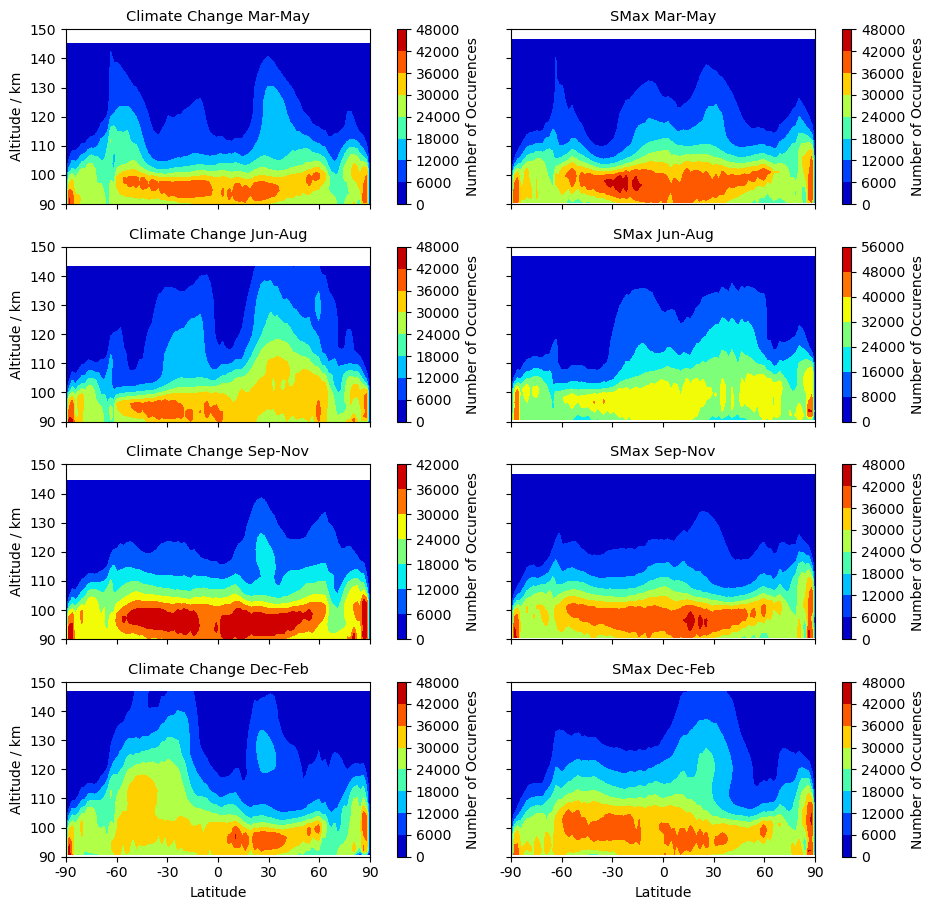

In [98]:
# Plotting number of occurences rather than occurence frequency, since no altitude information available if there is no Es layer present


vmin_Smax = 0
vmax_Smax = 14
nolevs_Smax = (vmax_Smax - vmin_Smax )+ 1

vmin_cli = 0
vmax_cli = 14
nolevs_cli = (vmax_cli - vmin_cli )+ 1 

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_cli = [SpEs_spr_cli_alt_lat, SpEs_sum_cli_alt_lat, SpEs_aut_cli_alt_lat, SpEs_win_cli_alt_lat] #tot_SpEsns_spr

alts_cli = [altavg_sl_spr_cli, altavg_sl_sum_cli, altavg_sl_aut_cli, altavg_sl_win]


titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    ax = axes[i, 0]

    alts_plot = alts_cli[i]
    
    C = ax.contourf(lat, alts_plot, data_cli, cmap=cmap, 
                   # levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate WACCM plots

    ax.set_ylabel('Altitude / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'Climate Change {titles_cli[i]}', fontsize=10.5)
    
    

subplots_Smax = [SpEs_spr_Smax_alt_lat, SpEs_sum_Smax_alt_lat, SpEs_aut_Smax_alt_lat, SpEs_win_Smax_alt_lat]

titles_Smax = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smax in enumerate(subplots_Smax):
    ax = axes[i, 1]

    C = ax.contourf(lat, alts_plot, data_Smax, cmap=cmap, 
                   # levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate COSMIC plots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'SMax {titles_Smax[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
# figname = f'{run_name}_Daviddata_AltLat.png'
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Alt - Lat 

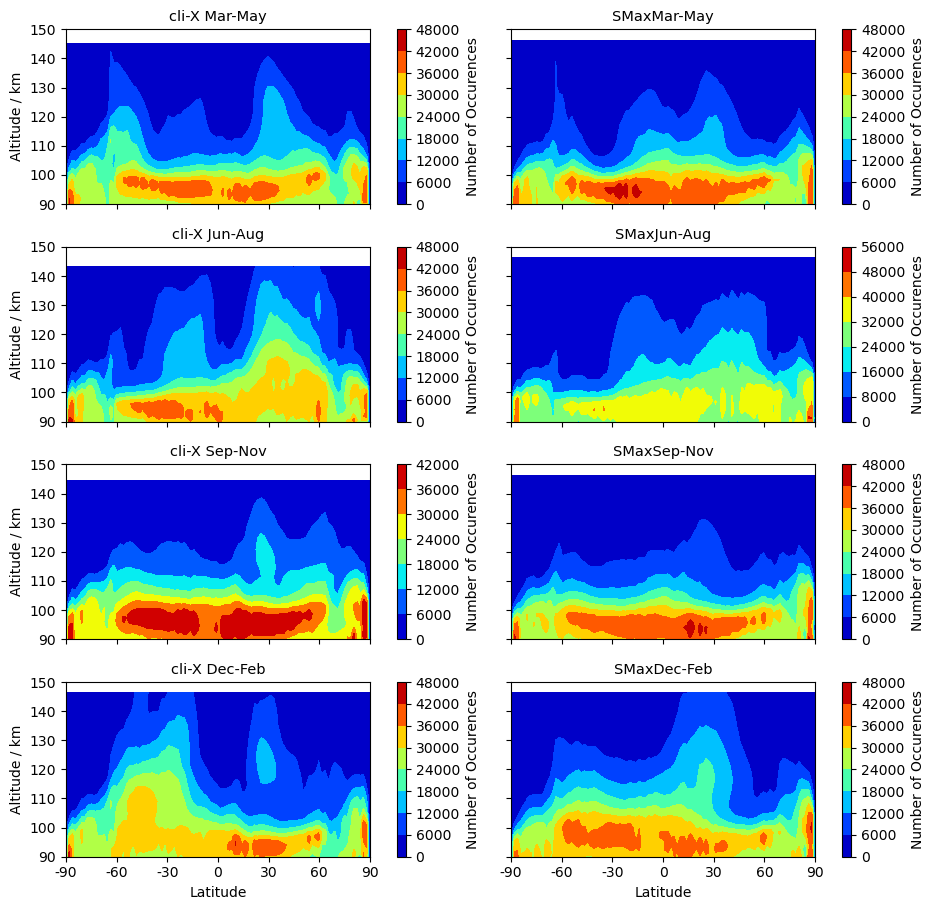

In [102]:
# Plotting number of occurences rather than occurence frequency, since no altitude information available if there is no Es layer present


vmin_Smax= 0
vmax_Smax= 14
nolevs_Smax= (vmax_Smax- vmin_Smax)+ 1

vmin_cli = 0
vmax_cli = 14
nolevs_cli = (vmax_cli - vmin_cli )+ 1 

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_cli = [SpEs_spr_cli_alt_lat, SpEs_sum_cli_alt_lat, SpEs_aut_cli_alt_lat, SpEs_win_cli_alt_lat]    #tot_SpEsns_spr
alts_cli = [altavg_sl_spr_cli, altavg_sl_sum_cli, altavg_sl_aut_cli, altavg_sl_win_cli]


titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    ax = axes[i, 0]

    alts_plot = alts_cli[i]
    
    C = ax.contourf(lat, alts_plot, data_cli, cmap=cmap, 
                  #  levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate cli plots

    ax.set_ylabel('Altitude / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'cli-X {titles_cli[i]}', fontsize=10.5)
    
    

subplots_Smax= [SpEs_spr_Smax_alt_lat, SpEs_sum_Smax_alt_lat, SpEs_aut_Smax_alt_lat, SpEs_win_Smax_alt_lat]
titles_Smax= ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smax in enumerate(subplots_Smax):
    ax = axes[i, 1]

    C = ax.contourf(lat, alts_plot, data_Smax, cmap=cmap, 
                  #  levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  # Remove xticks for intermediate Smaxplots

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Number of Occurences')

    ax.set_title(f'SMax{titles_Smax[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
# figname = f'{run_name}_Daviddata_AltLat.png'
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Data normalisation

In [106]:
# Climate change data normalisation

stddevF = 1

SpEs_spr_cli_alt_lat = xr.DataArray(SpEs_spr_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_cli_alt_lat = xr.DataArray(SpEs_sum_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_cli_alt_lat = xr.DataArray(SpEs_aut_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_cli_alt_lat = xr.DataArray(SpEs_win_cli_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

combined_cli = xr.concat([SpEs_spr_cli_alt_lat, SpEs_sum_cli_alt_lat, SpEs_aut_cli_alt_lat, SpEs_win_cli_alt_lat], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_cli = combined_cli.min(dim=['season', 'lev_sl', 'lat'])
overall_max_cli = combined_cli.max(dim=['season', 'lev_sl', 'lat'])

SpEs_spr_alt_lat_norm_cli = (SpEs_spr_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)
SpEs_sum_alt_lat_norm_cli = (SpEs_sum_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)
SpEs_aut_alt_lat_norm_cli = (SpEs_aut_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)
SpEs_win_alt_lat_norm_cli = (SpEs_win_cli_alt_lat - overall_min_cli) / (overall_max_cli - overall_min_cli)


In [107]:
# Smax data normalisation

stddevF = 1

SpEs_spr_Smax_alt_lat = xr.DataArray(SpEs_spr_Smax_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'spring'})
SpEs_sum_Smax_alt_lat = xr.DataArray(SpEs_sum_Smax_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'summer'})
SpEs_aut_Smax_alt_lat = xr.DataArray(SpEs_aut_Smax_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'autumn'})
SpEs_win_Smax_alt_lat = xr.DataArray(SpEs_win_Smax_alt_lat, dims=('lev_sl', 'lat'), coords={'season': 'winter'})

combined_Smax = xr.concat([SpEs_spr_Smax_alt_lat, SpEs_sum_Smax_alt_lat, SpEs_aut_Smax_alt_lat, SpEs_win_Smax_alt_lat], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_Smax = combined_Smax.min(dim=['season', 'lev_sl', 'lat'])
overall_max_Smax = combined_Smax.max(dim=['season', 'lev_sl', 'lat'])

SpEs_spr_alt_lat_norm_Smax = (SpEs_spr_Smax_alt_lat - overall_min_Smax) / (overall_max_Smax - overall_min_Smax)
SpEs_sum_alt_lat_norm_Smax = (SpEs_sum_Smax_alt_lat - overall_min_Smax) / (overall_max_Smax - overall_min_Smax)
SpEs_aut_alt_lat_norm_Smax = (SpEs_aut_Smax_alt_lat - overall_min_Smax) / (overall_max_Smax - overall_min_Smax)
SpEs_win_alt_lat_norm_Smax = (SpEs_win_Smax_alt_lat - overall_min_Smax) / (overall_max_Smax - overall_min_Smax)


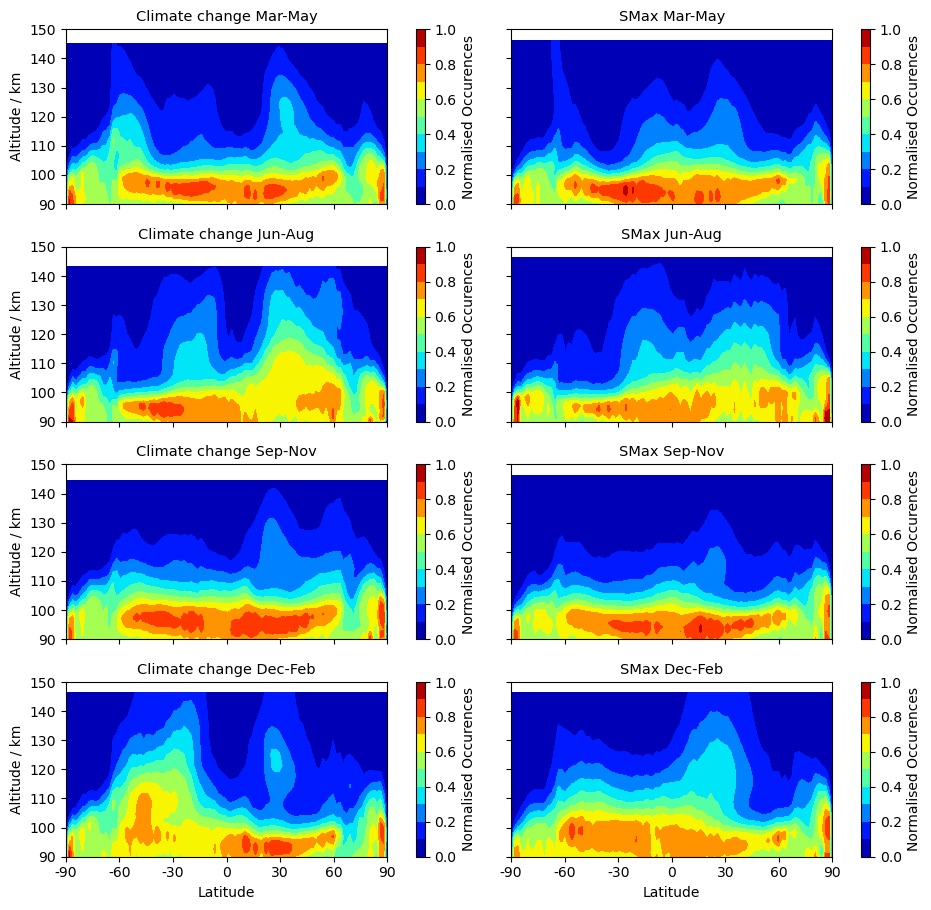

In [110]:
# Plotting NORMALISED number of occurences, so each of Smax and cli datasets are normalised to themselves (max/min values)


vmin_Smax = 0
vmax_Smax = 1 #12
nolevs_Smax = 11 #(vmax_Smax - vmin_Smax )+ 1

vmin_cli = 0
vmax_cli = 1 #12
nolevs_cli = 11 #(vmax_cli - vmin_cli )+ 1 

cmap = plt.get_cmap('jet')

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)



subplots_cli = [SpEs_spr_alt_lat_norm_cli, SpEs_sum_alt_lat_norm_cli, SpEs_aut_alt_lat_norm_cli, SpEs_win_alt_lat_norm_cli]    #tot_SpEsns_spr
alts_cli = [altavg_sl_spr_cli, altavg_sl_sum_cli, altavg_sl_aut_cli, altavg_sl_win_cli]


titles_cli = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_cli in enumerate(subplots_cli):
    ax = axes[i, 0]

    alts_plot = alts_cli[i]
    
    C = ax.contourf(lat, alts_plot, data_cli, cmap=cmap, 
                    levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli), vmin=vmin_cli, vmax=vmax_cli
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  

    ax.set_ylabel('Altitude / km')


    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Normalised Occurences')

    ax.set_title(f'Climate change {titles_cli[i]}', fontsize=10.5)
    
    

subplots_Smax = [SpEs_spr_alt_lat_norm_Smax, SpEs_sum_alt_lat_norm_Smax, SpEs_aut_alt_lat_norm_Smax, SpEs_win_alt_lat_norm_Smax] 
titles_Smax = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data_Smax in enumerate(subplots_Smax):
    ax = axes[i, 1]

    C = ax.contourf(lat, alts_plot, data_Smax, cmap=cmap, 
                    levels=np.linspace(vmin_Smax, vmax_Smax, nolevs_Smax), vmin=vmin_Smax, vmax=vmax_Smax
                   )

    if i == 3:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    else:
        ax.set_xticks([])  

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'Normalised Occurences')

    ax.set_title(f'SMax {titles_Smax[i]}', fontsize=10.5)
    
ax.set_ylim(90,150)

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# figname = f'{run_name}_Daviddata_AltLat_norm.png'
# plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()


# Lat - LT - specific alt - SUMMER AND WINTER

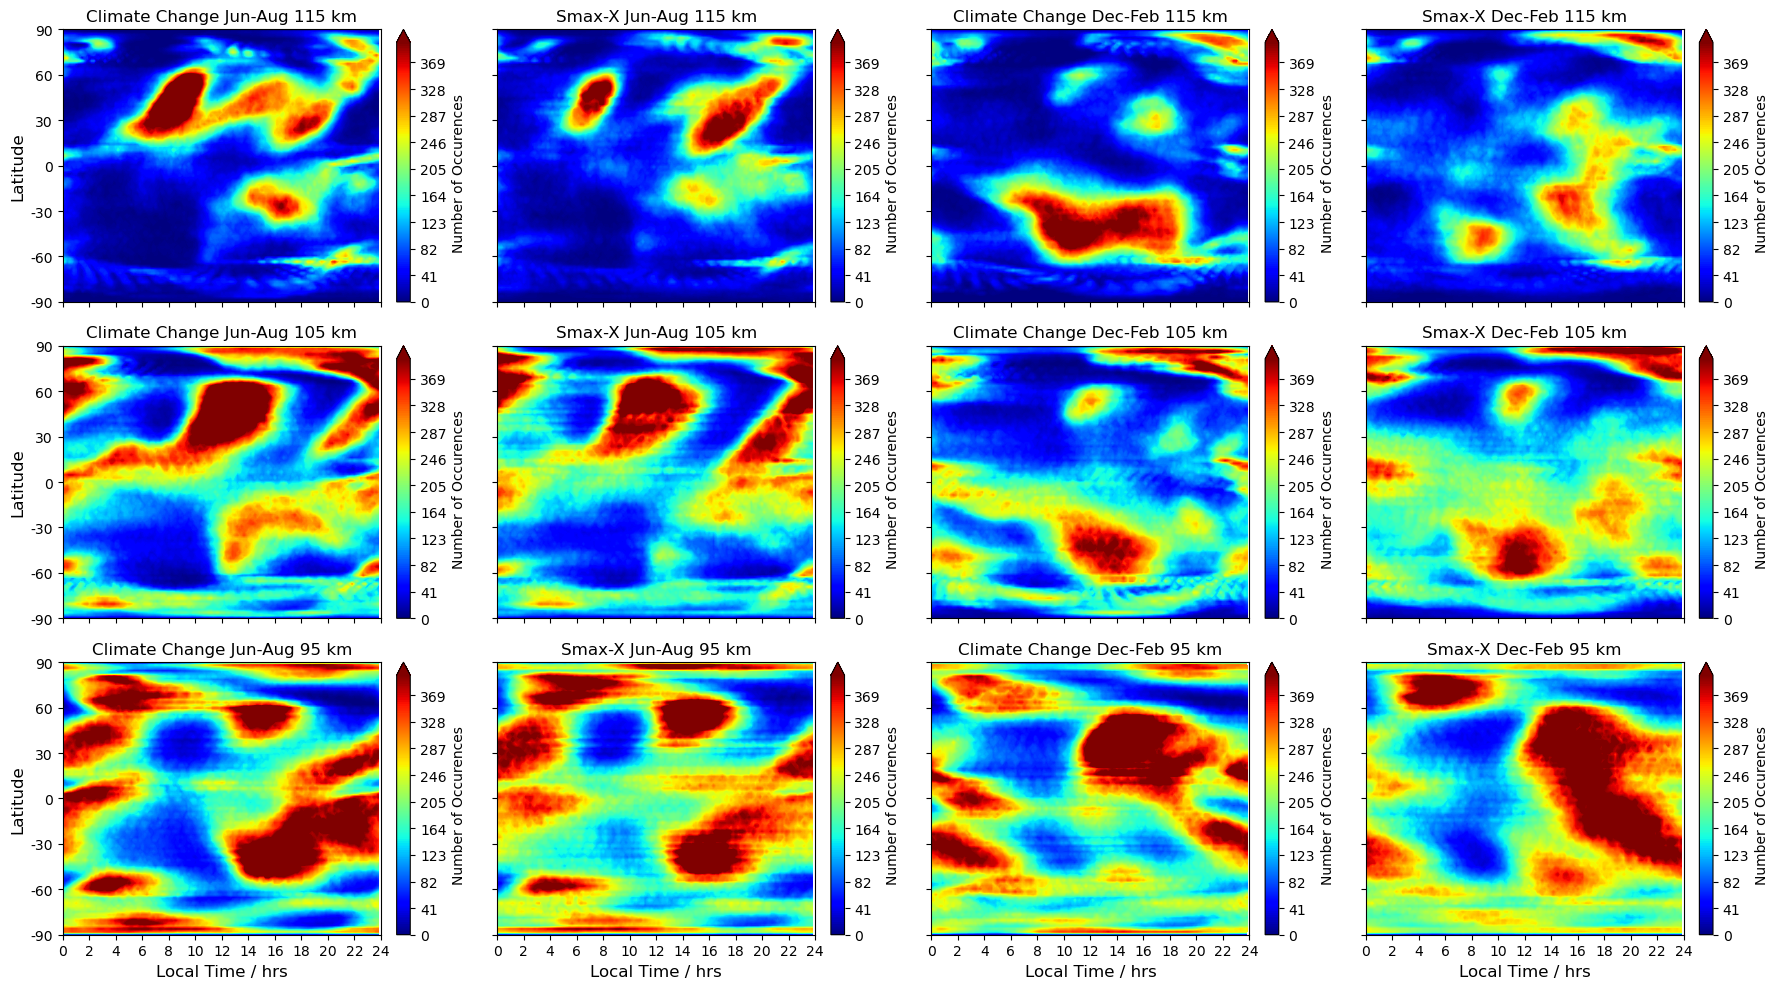

In [118]:
timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

# cli
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(altavg_sl_win_cli.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum_cli.values - np.array(plot_alts)[:, None]), axis=1)

# Smax
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
winindices = np.argmin(np.abs(altavg_sl_win_Smax.values - np.array(plot_alts)[:, None]), axis=1)
sumindices = np.argmin(np.abs(altavg_sl_sum_Smax.values - np.array(plot_alts)[:, None]), axis=1)


fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

vmin_Smax = 0
vmax_Smax = 400
nolevs_Smax = 401 #(vmax_Smax - vmin_Smax )+ 1 
cmap_Smax = plt.get_cmap('jet')

vmin_cli = 0
vmax_cli = 400
nolevs_cli = 401 #(vmax_cli - vmin_cli )+ 1 
cmap_cli = plt.get_cmap('jet')

for i, ialt in enumerate(plot_alts):
    altindex = winindices[i]
    tot_SpEs_sum_cli_plot = tot_SpEs_sum_cli[altindex, :, :]

    altindex = sumindices[i]
    tot_SpEs_win_cli_plot = tot_SpEs_win_cli[altindex, :, :]


    # cli
    subplots_cli = [tot_SpEs_sum_cli_plot, tot_SpEs_win_cli_plot]
    titles_cli = ['Jun-Aug', 'Dec-Feb']


    for j, data_cli in enumerate(subplots_cli):
        row_cli = i
        col_cli = j * 2
        ax_cli = axes_combined[row_cli, col_cli]

        C_cli = ax_cli.contourf(timeplot_144, lat, data_cli, cmap=cmap_cli
                                    ,levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),vmin=vmin_cli, vmax=vmax_cli
                                    ,extend='max'
                                    )

        if row_cli == 2:
            ax_cli.set_xlabel('Local Time / hrs',fontsize=12)
        if col_cli == 0:
            ax_cli.set_ylabel('Latitude',fontsize=12)
            ax_cli.set_yticks(np.linspace(-90, 90, 7))
            ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))
        ax_cli.set_title(f'Climate Change {titles_cli[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)
        cbar_cli.set_label(r'Number of Occurences')
        

for i, ialt in enumerate(plot_alts):
    altindex = winindices[i]
    tot_SpEs_sum_Smax_plot = tot_SpEs_sum_Smax[altindex, :, :]

    altindex = sumindices[i]
    tot_SpEs_win_Smax_plot = tot_SpEs_win_Smax[altindex, :, :]


    # Smax
    subplots_Smax = [tot_SpEs_sum_Smax_plot, tot_SpEs_win_Smax_plot]
    titles_Smax = ['Jun-Aug', 'Dec-Feb']


    for j, data_Smax in enumerate(subplots_Smax):
        row_Smax = i
        col_Smax = j * 2 + 1
        ax_Smax = axes_combined[row_Smax, col_Smax]

        C_Smax = ax_Smax.contourf(timeplot_144, lat, data_Smax, cmap=cmap_Smax
                                    ,levels=np.linspace(vmin_Smax, vmax_Smax, nolevs_Smax),vmin=vmin_Smax, vmax=vmax_Smax
                                    ,extend='max'
                                    )

        if row_Smax == 2:
            ax_Smax.set_xlabel('Local Time / hrs',fontsize=12)
        if col_Smax == 0:
            ax_Smax.set_ylabel('Latitude',fontsize=12)
            ax_Smax.set_yticks(np.linspace(-90, 90, 7))
            ax_Smax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_Smax = np.linspace(0, 24, 13)
        ax_Smax.set_xticks(xticks_Smax)
        ax_Smax.set_xticklabels(xticks_Smax.astype(int))
        ax_Smax.set_title(f'Smax-X {titles_Smax[j]} {plot_alts[i]} km')
        
        # Create individual colorbar for each subplot
        cbar_Smax = fig_combined.colorbar(C_Smax, ax=ax_Smax, pad=0.04)
        cbar_Smax.set_label(r'Number of Occurences')



plt.tight_layout()

# figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_sum_cli-win.png'
#plt.savefig(f'Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()


In [123]:
# Normalise Data - WACCM
#============================

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

winindices_cli = np.argmin(np.abs(altavg_sl_win_cli.values - np.array(plot_alts)[:, None]), axis=1)
sumindices_cli = np.argmin(np.abs(altavg_sl_sum_cli.values - np.array(plot_alts)[:, None]), axis=1)
autindices_cli = np.argmin(np.abs(altavg_sl_aut_cli.values - np.array(plot_alts)[:, None]), axis=1)
sprindices_cli = np.argmin(np.abs(altavg_sl_spr_cli.values - np.array(plot_alts)[:, None]), axis=1)


cli_data_sum = xr.DataArray(tot_SpEs_sum_cli[sumindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'summer'})
cli_data_win = xr.DataArray(tot_SpEs_win_cli[winindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'winter'})
cli_data_spr = xr.DataArray(tot_SpEs_spr_cli[sprindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'spring'})
cli_data_aut = xr.DataArray(tot_SpEs_aut_cli[autindices_cli, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'autumn'})

combined_w_cli = xr.concat([cli_data_sum, cli_data_win, cli_data_spr, cli_data_aut], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_w_cli = combined_w_cli.min(dim=['season', 'alt', 'lat', 'LT_L'])
overall_max_w_cli = combined_w_cli.max(dim=['season', 'alt', 'lat', 'LT_L'])

tot_SpEs_sum_115_norm_cli = (tot_SpEs_sum_cli[sumindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_sum_105_norm_cli = (tot_SpEs_sum_cli[sumindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_sum_95_norm_cli =  (tot_SpEs_sum_cli[sumindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

tot_SpEs_win_115_norm_cli = (tot_SpEs_win_cli[winindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_win_105_norm_cli = (tot_SpEs_win_cli[winindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_win_95_norm_cli =  (tot_SpEs_win_cli[winindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

tot_SpEs_spr_115_norm_cli = (tot_SpEs_spr_cli[sprindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_spr_105_norm_cli = (tot_SpEs_spr_cli[sprindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_spr_95_norm_cli =  (tot_SpEs_spr_cli[sprindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

tot_SpEs_aut_115_norm_cli = (tot_SpEs_aut_cli[autindices_cli[0], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_aut_105_norm_cli = (tot_SpEs_aut_cli[autindices_cli[1], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)
tot_SpEs_aut_95_norm_cli =  (tot_SpEs_aut_cli[autindices_cli[2], :, :] - overall_min_w_cli) / (overall_max_w_cli - overall_min_w_cli)

In [124]:
# Normalise Data - WACCM
#============================

plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low

winindices_Smax = np.argmin(np.abs(altavg_sl_win_Smax.values - np.array(plot_alts)[:, None]), axis=1)
sumindices_Smax = np.argmin(np.abs(altavg_sl_sum_Smax.values - np.array(plot_alts)[:, None]), axis=1)
autindices_Smax = np.argmin(np.abs(altavg_sl_aut_Smax.values - np.array(plot_alts)[:, None]), axis=1)
sprindices_Smax = np.argmin(np.abs(altavg_sl_spr_Smax.values - np.array(plot_alts)[:, None]), axis=1)


Smax_data_sum = xr.DataArray(tot_SpEs_sum_Smax[sumindices_Smax, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'summer'})
Smax_data_win = xr.DataArray(tot_SpEs_win_Smax[winindices_Smax, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'winter'})
Smax_data_spr = xr.DataArray(tot_SpEs_spr_Smax[sprindices_Smax, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'spring'})
Smax_data_aut = xr.DataArray(tot_SpEs_aut_Smax[autindices_Smax, :, :], dims=('alt','lat', 'LT_L'), coords={'season': 'autumn'})

combined_w_Smax = xr.concat([Smax_data_sum, Smax_data_win, Smax_data_spr, Smax_data_aut], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_w_Smax = combined_w_Smax.min(dim=['season', 'alt', 'lat', 'LT_L'])
overall_max_w_Smax = combined_w_Smax.max(dim=['season', 'alt', 'lat', 'LT_L'])

tot_SpEs_sum_115_norm_Smax = (tot_SpEs_sum_Smax[sumindices_Smax[0], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_sum_105_norm_Smax = (tot_SpEs_sum_Smax[sumindices_Smax[1], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_sum_95_norm_Smax =  (tot_SpEs_sum_Smax[sumindices_Smax[2], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)

tot_SpEs_win_115_norm_Smax = (tot_SpEs_win_Smax[winindices_Smax[0], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_win_105_norm_Smax = (tot_SpEs_win_Smax[winindices_Smax[1], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_win_95_norm_Smax =  (tot_SpEs_win_Smax[winindices_Smax[2], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)

tot_SpEs_spr_115_norm_Smax = (tot_SpEs_spr_Smax[sprindices_Smax[0], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_spr_105_norm_Smax = (tot_SpEs_spr_Smax[sprindices_Smax[1], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_spr_95_norm_Smax =  (tot_SpEs_spr_Smax[sprindices_Smax[2], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)

tot_SpEs_aut_115_norm_Smax = (tot_SpEs_aut_Smax[autindices_Smax[0], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_aut_105_norm_Smax = (tot_SpEs_aut_Smax[autindices_Smax[1], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)
tot_SpEs_aut_95_norm_Smax =  (tot_SpEs_aut_Smax[autindices_Smax[2], :, :] - overall_min_w_Smax) / (overall_max_w_Smax - overall_min_w_Smax)

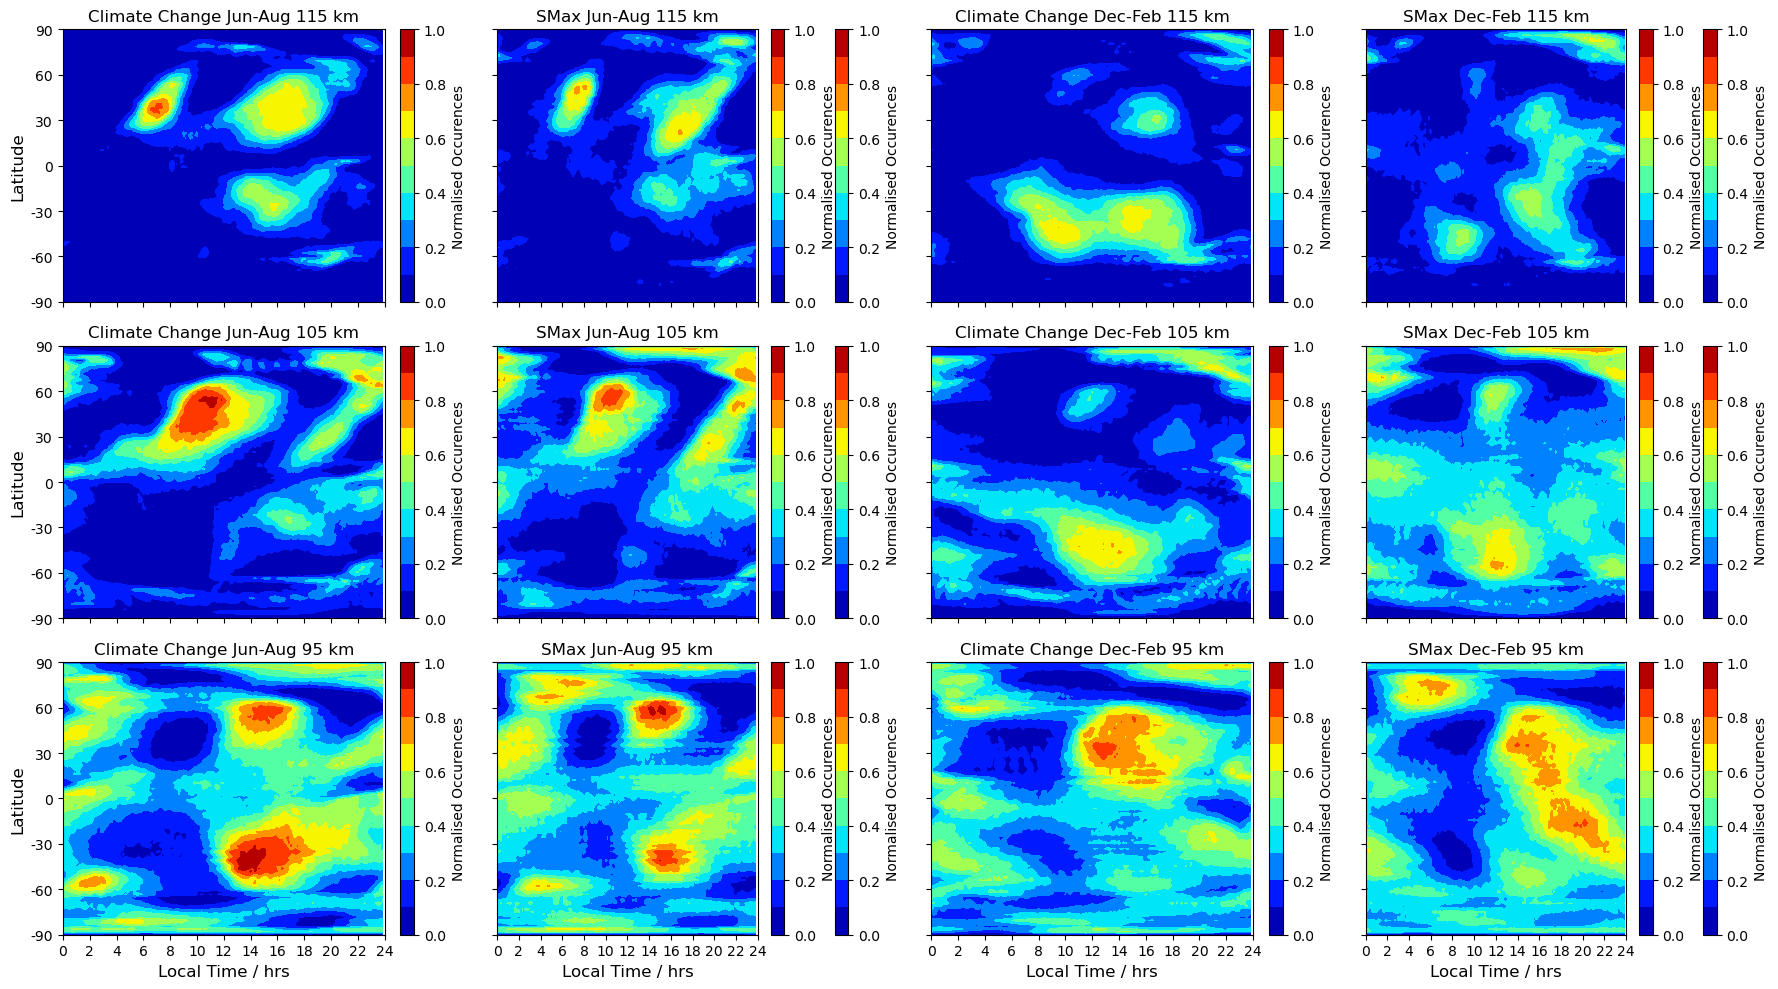

In [136]:
#==============================
# Plot Normalised Data 
#==============================

timeplot_144 = np.linspace(0, 24, 144, endpoint=False)

#cli
plot_alts = [115, 105, 95] #must be in reverse altitude order from high to low
win_cli_indices = np.argmin(np.abs(altavg_sl_win_cli.values - np.array(plot_alts)[:, None]), axis=1)
sum_cli_indices = np.argmin(np.abs(altavg_sl_sum_cli.values - np.array(plot_alts)[:, None]), axis=1)

#Smax


fig_combined, axes_combined = plt.subplots(nrows=3, ncols=4, figsize=(18, 10),
                                           sharex=True, sharey=True)

vmin_Smax = 0#
vmax_Smax = 1
nolevs_Smax = 11 #(vmax_Smax - vmin_Smax )+ 1 
cmap_Smax = plt.get_cmap('jet')

vmin_cli = 0#-1.5
vmax_cli = 1#4
nolevs_cli = 11 #(vmax_cli - vmin_cli )+ 1 
cmap_cli = plt.get_cmap('jet')

# Iterate over altitudes
for i, ialt in enumerate(plot_alts):

    if ialt == 115:
        sum_cli_data = tot_SpEs_sum_115_norm_cli 
        win_cli_data = tot_SpEs_win_115_norm_cli 
    elif ialt == 105:
        sum_cli_data = tot_SpEs_sum_105_norm_cli 
        win_cli_data = tot_SpEs_win_105_norm_cli 
    else:
        sum_cli_data = tot_SpEs_sum_95_norm_cli 
        win_cli_data = tot_SpEs_win_95_norm_cli 
        
    subplots_cli = [sum_cli_data, win_cli_data]
    titles_cli = ['Jun-Aug', 'Dec-Feb']

    for j, data_cli in enumerate(subplots_cli):
        row_cli = i
        col_cli = j * 2  
        ax_cli = axes_combined[row_cli, col_cli]

        C_cli = ax_cli.contourf(timeplot_144, lat, data_cli, cmap=cmap_cli
                                    ,levels=np.linspace(vmin_cli, vmax_cli, nolevs_cli),vmin=vmin_cli, vmax=vmax_cli
                                   # ,extend='max'
                                    )

        if row_cli == 2:
            ax_cli.set_xlabel('Local Time / hrs',fontsize=12)
        if col_cli == 0:
            ax_cli.set_ylabel('Latitude',fontsize=12)
            ax_cli.set_yticks(np.linspace(-90, 90, 7))
            ax_cli.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        xticks_cli = np.linspace(0, 24, 13)
        ax_cli.set_xticks(xticks_cli)
        ax_cli.set_xticklabels(xticks_cli.astype(int))
        ax_cli.set_title(f'Climate Change {titles_cli[j]} {plot_alts[i]} km')
        

        cbar_cli = fig_combined.colorbar(C_cli, ax=ax_cli, pad=0.04)
        cbar_cli.set_label(r'Normalised Occurences')
        

        if ialt == 115:
            sum_Smax_data = tot_SpEs_sum_115_norm_Smax 
            win_Smax_data = tot_SpEs_win_115_norm_Smax 
        elif ialt == 105:
            sum_Smax_data = tot_SpEs_sum_105_norm_Smax 
            win_Smax_data = tot_SpEs_win_105_norm_Smax 
        else:
            sum_Smax_data = tot_SpEs_sum_95_norm_Smax 
            win_Smax_data = tot_SpEs_win_95_norm_Smax 
            
        subplots_Smax = [sum_Smax_data, win_Smax_data]
        titles_Smax = ['Jun-Aug', 'Dec-Feb']
    
        for j, data_Smax in enumerate(subplots_Smax):
            row_Smax = i
            col_Smax = j * 2 + 1
            ax_Smax = axes_combined[row_Smax, col_Smax]
    
            C_Smax = ax_Smax.contourf(timeplot_144, lat, data_Smax, cmap=cmap_Smax
                                        ,levels=np.linspace(vmin_Smax, vmax_Smax, nolevs_Smax),vmin=vmin_Smax, vmax=vmax_Smax
                                       # ,extend='max'
                                        )
    
            if row_Smax == 2:
                ax_Smax.set_xlabel('Local Time / hrs',fontsize=12)
            if col_Smax == 0:
                ax_Smax.set_ylabel('Latitude',fontsize=12)
                ax_Smax.set_yticks(np.linspace(-90, 90, 7))
                ax_Smax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
            xticks_Smax = np.linspace(0, 24, 13)
            ax_Smax.set_xticks(xticks_Smax)
            ax_Smax.set_xticklabels(xticks_Smax.astype(int))
            ax_Smax.set_title(f'SMax {titles_Smax[j]} {plot_alts[i]} km')
            
    
            cbar_Smax = fig_combined.colorbar(C_Smax, ax=ax_Smax, pad=0.04)
            cbar_Smax.set_label(r'Normalised Occurences')



plt.tight_layout()

# figname_combined = f'{run_name}_Daviddata_Lat_vs_LT_3xalt_sum_cli-win_cli_norm.png'
# plt.savefig(f'./Figures/Combined/{filename_append}/' + str(figname_combined), dpi=400, bbox_inches='tight')

plt.show()

# Winds

In [152]:
#============================
# Climate Chnage data normalisation: 15-20
#============================

#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20_cli = np.where((intlat >= 15) & (intlat <= 20))[0]

SpEs_spr_15_20_cli = np.squeeze(tot_SpEs_spr_cli_5deg[:, ind_15_20_cli, :])    #(19, 144)
SpEs_sum_15_20_cli = np.squeeze(tot_SpEs_sum_cli_5deg[:, ind_15_20_cli, :])
SpEs_aut_15_20_cli = np.squeeze(tot_SpEs_aut_cli_5deg[:, ind_15_20_cli, :])
SpEs_win_15_20_cli = np.squeeze(tot_SpEs_win_cli_5deg[:, ind_15_20_cli, :])

SpEs_spr_altLT_15_20_cli = xr.DataArray(SpEs_spr_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_15_20_cli = xr.DataArray(SpEs_sum_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_15_20_cli = xr.DataArray(SpEs_aut_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_15_20_cli = xr.DataArray(SpEs_win_15_20_cli, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_15_20_cli = xr.concat([SpEs_spr_altLT_15_20_cli, SpEs_sum_altLT_15_20_cli, SpEs_aut_altLT_15_20_cli, SpEs_win_altLT_15_20_cli], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_15_20_cli = combined_15_20_cli.min(dim=['season', 'lev_sl', 'LT'])
overall_max_15_20_cli = combined_15_20_cli.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_15_20_norm_cli = (SpEs_spr_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)
SpEs_sum_altLT_15_20_norm_cli = (SpEs_sum_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)
SpEs_aut_altLT_15_20_norm_cli = (SpEs_aut_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)
SpEs_win_altLT_15_20_norm_cli = (SpEs_win_altLT_15_20_cli - overall_min_15_20_cli) / (overall_max_15_20_cli - overall_min_15_20_cli)

In [153]:
#============================
# Climate Chnage data normalisation: 45-50
#============================

ind_45_50_cli = np.where((intlat >= 45) & (intlat <= 50))[0]

SpEs_spr_45_50_cli = np.squeeze(tot_SpEs_spr_cli_5deg[:, ind_45_50_cli, :])
SpEs_sum_45_50_cli = np.squeeze(tot_SpEs_sum_cli_5deg[:, ind_45_50_cli, :])
SpEs_aut_45_50_cli = np.squeeze(tot_SpEs_aut_cli_5deg[:, ind_45_50_cli, :])
SpEs_win_45_50_cli = np.squeeze(tot_SpEs_win_cli_5deg[:, ind_45_50_cli, :])

SpEs_spr_altLT_45_50_cli = xr.DataArray(SpEs_spr_45_50_cli, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_45_50_cli = xr.DataArray(SpEs_sum_45_50_cli, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_45_50_cli = xr.DataArray(SpEs_aut_45_50_cli, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_45_50_cli = xr.DataArray(SpEs_win_45_50_cli, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_45_50_cli = xr.concat([SpEs_spr_altLT_45_50_cli, SpEs_sum_altLT_45_50_cli, SpEs_aut_altLT_45_50_cli, SpEs_win_altLT_45_50_cli], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_45_50_cli = combined_45_50_cli.min(dim=['season', 'lev_sl', 'LT'])
overall_max_45_50_cli = combined_45_50_cli.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_45_50_norm_cli = (SpEs_spr_altLT_45_50_cli - overall_min_45_50_cli) / (overall_max_45_50_cli - overall_min_45_50_cli)
SpEs_sum_altLT_45_50_norm_cli = (SpEs_sum_altLT_45_50_cli - overall_min_45_50_cli) / (overall_max_45_50_cli - overall_min_45_50_cli)
SpEs_aut_altLT_45_50_norm_cli = (SpEs_aut_altLT_45_50_cli - overall_min_45_50_cli) / (overall_max_45_50_cli - overall_min_45_50_cli)
SpEs_win_altLT_45_50_norm_cli = (SpEs_win_altLT_45_50_cli - overall_min_45_50_cli) / (overall_max_45_50_cli - overall_min_45_50_cli)

In [154]:
#============================
# Smax data normalisation: 15-20
#============================

#-------------------------------------------------------------------------------------------------------------------------------------------
ind_15_20_Smax = np.where((intlat >= 15) & (intlat <= 20))[0]

SpEs_spr_15_20_Smax = np.squeeze(tot_SpEs_spr_Smax_5deg[:, ind_15_20_Smax, :])    #(19, 144)
SpEs_sum_15_20_Smax = np.squeeze(tot_SpEs_sum_Smax_5deg[:, ind_15_20_Smax, :])
SpEs_aut_15_20_Smax = np.squeeze(tot_SpEs_aut_Smax_5deg[:, ind_15_20_Smax, :])
SpEs_win_15_20_Smax = np.squeeze(tot_SpEs_win_Smax_5deg[:, ind_15_20_Smax, :])

SpEs_spr_altLT_15_20_Smax = xr.DataArray(SpEs_spr_15_20_Smax, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_15_20_Smax = xr.DataArray(SpEs_sum_15_20_Smax, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_15_20_Smax = xr.DataArray(SpEs_aut_15_20_Smax, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_15_20_Smax = xr.DataArray(SpEs_win_15_20_Smax, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_15_20_Smax = xr.concat([SpEs_spr_altLT_15_20_Smax, SpEs_sum_altLT_15_20_Smax, SpEs_aut_altLT_15_20_Smax, SpEs_win_altLT_15_20_Smax], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_15_20_Smax = combined_15_20_Smax.min(dim=['season', 'lev_sl', 'LT'])
overall_max_15_20_Smax = combined_15_20_Smax.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_15_20_norm_Smax = (SpEs_spr_altLT_15_20_Smax - overall_min_15_20_Smax) / (overall_max_15_20_Smax - overall_min_15_20_Smax)
SpEs_sum_altLT_15_20_norm_Smax = (SpEs_sum_altLT_15_20_Smax - overall_min_15_20_Smax) / (overall_max_15_20_Smax - overall_min_15_20_Smax)
SpEs_aut_altLT_15_20_norm_Smax = (SpEs_aut_altLT_15_20_Smax - overall_min_15_20_Smax) / (overall_max_15_20_Smax - overall_min_15_20_Smax)
SpEs_win_altLT_15_20_norm_Smax = (SpEs_win_altLT_15_20_Smax - overall_min_15_20_Smax) / (overall_max_15_20_Smax - overall_min_15_20_Smax)

In [155]:
#============================
# Smax data normalisation: 45-50
#============================

ind_45_50_Smax = np.where((intlat >= 45) & (intlat <= 50))[0]

SpEs_spr_45_50_Smax = np.squeeze(tot_SpEs_spr_Smax_5deg[:, ind_45_50_Smax, :])
SpEs_sum_45_50_Smax = np.squeeze(tot_SpEs_sum_Smax_5deg[:, ind_45_50_Smax, :])
SpEs_aut_45_50_Smax = np.squeeze(tot_SpEs_aut_Smax_5deg[:, ind_45_50_Smax, :])
SpEs_win_45_50_Smax = np.squeeze(tot_SpEs_win_Smax_5deg[:, ind_45_50_Smax, :])

SpEs_spr_altLT_45_50_Smax = xr.DataArray(SpEs_spr_45_50_Smax, dims=('lev_sl', 'LT'), coords={'season': 'spring'})
SpEs_sum_altLT_45_50_Smax = xr.DataArray(SpEs_sum_45_50_Smax, dims=('lev_sl', 'LT'), coords={'season': 'summer'})
SpEs_aut_altLT_45_50_Smax = xr.DataArray(SpEs_aut_45_50_Smax, dims=('lev_sl', 'LT'), coords={'season': 'autumn'})
SpEs_win_altLT_45_50_Smax = xr.DataArray(SpEs_win_45_50_Smax, dims=('lev_sl', 'LT'), coords={'season': 'winter'})

combined_45_50_Smax = xr.concat([SpEs_spr_altLT_45_50_Smax, SpEs_sum_altLT_45_50_Smax, SpEs_aut_altLT_45_50_Smax, SpEs_win_altLT_45_50_Smax], dim='season')

#======================================
# Normalise Data by Min-Max
#======================================

overall_min_45_50_Smax = combined_45_50_Smax.min(dim=['season', 'lev_sl', 'LT'])
overall_max_45_50_Smax = combined_45_50_Smax.max(dim=['season', 'lev_sl', 'LT'])

SpEs_spr_altLT_45_50_norm_Smax = (SpEs_spr_altLT_45_50_Smax - overall_min_45_50_Smax) / (overall_max_45_50_Smax - overall_min_45_50_Smax)
SpEs_sum_altLT_45_50_norm_Smax = (SpEs_sum_altLT_45_50_Smax - overall_min_45_50_Smax) / (overall_max_45_50_Smax - overall_min_45_50_Smax)
SpEs_aut_altLT_45_50_norm_Smax = (SpEs_aut_altLT_45_50_Smax - overall_min_45_50_Smax) / (overall_max_45_50_Smax - overall_min_45_50_Smax)
SpEs_win_altLT_45_50_norm_Smax = (SpEs_win_altLT_45_50_Smax - overall_min_45_50_Smax) / (overall_max_45_50_Smax - overall_min_45_50_Smax)

In [156]:
# Open/create dataset for seasons, selecting only UT=00:00 each day

ds_months_sets = [['06', '07', '08'] , ['12', '01', '02']]
Monthstr_sets = [['Jun', 'Jul', 'Aug'] , ['Dec', 'Jan', 'Feb']]
season_set = ['summer', 'winter']

run_name = 'Wuhu_IonTr_run'


plotdata = {}

for season_idx, months in enumerate(ds_months_sets):
    season_name = season_set[season_idx]
    Monthstr = Monthstr_sets[season_idx]
    
    file_paths = []
    for month in months:
        pattern = f'/resstore/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h2.2100-{month}-*.nc'
        # Use glob to get all files matching the pattern
        file_paths.extend(glob.glob(pattern))
    
    ds = xr.open_mfdataset(file_paths, combine='by_coords')
    
    # Select only UT00:00 time steps
    ds = ds.isel(time=slice(None, None, 24))
    
    #----------------------------------------------------

    lon = ds['lon']
    lat = ds['lat']
    geopH = ds['Z3'] / 1000  # m -> km
    temp = ds['T']
    U = ds['U']
    
    Re = 6378  # Earth radius in km
    alt = (geopH * Re) / (Re - geopH)
    altav = alt.mean(dim='time')
    
    Uav = U.mean(dim='time')
    Tav = temp.mean(dim='time')
    
    alt_min, alt_max = 90, 155  # km
    
    #----------------------------------------------------
    # Calculate local time offset in hours (assuming 15 degrees = 1 hour difference)
    local_time_offset = lon / 15.0  

    # UT hour
    snapshot_utc_time = 0  # hours

    # Convert UTC time (12:00) to local time for each longitude
    local_times = (snapshot_utc_time + local_time_offset) % 24
    #----------------------------------------------------

    for lat_val in [17.5, 47.5]:
        lat_idx = np.abs(lat - lat_val).argmin()
        
        altll = altav.sel(lat=lat[lat_idx]).mean(dim='lon')
        
        # alt_min_idx = np.abs(altll - alt_min).argmin().values
        # alt_max_idx = np.abs(altll - alt_max).argmin().values
        
        alt_min_idx = 60   
        alt_max_idx = 38 
        
        U_plot = Uav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        T_plot = Tav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        alt_plot = altll.isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        
        plotdata[f'U_plot_{lat_val}_{season_name}'] = U_plot
        plotdata[f'T_plot_{lat_val}_{season_name}'] = T_plot
        plotdata[f'alt_plot_{lat_val}_{season_name}'] = alt_plot

print('done')
#print(plotdata.keys())  # Check keys in the dictionary

done


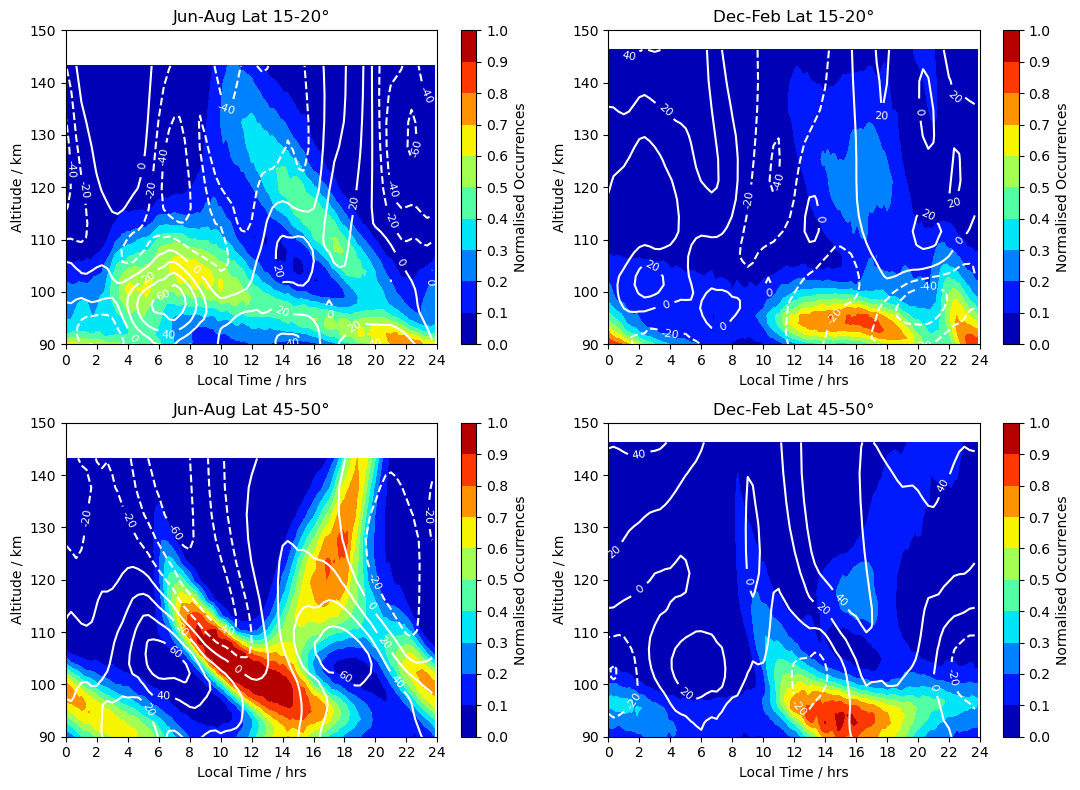

In [161]:
import matplotlib.pyplot as plt
import numpy as np

plot_data_U_summer = [plotdata['U_plot_17.5_summer'][:, ::2], plotdata['U_plot_47.5_summer'][:, ::2]]
plot_data_U_winter = [plotdata['U_plot_17.5_winter'][:, ::2], plotdata['U_plot_47.5_winter'][:, ::2]]

plot_data_alt_summer = [plotdata['alt_plot_17.5_summer'], plotdata['alt_plot_47.5_summer']]
plot_data_alt_winter = [plotdata['alt_plot_17.5_winter'], plotdata['alt_plot_47.5_winter']]

plot_data_SpEs_summer = [SpEs_sum_altLT_15_20_norm_cli, SpEs_sum_altLT_45_50_norm_cli]
plot_data_SpEs_winter = [SpEs_win_altLT_15_20_norm_cli, SpEs_win_altLT_45_50_norm_cli]


vmin_waccm = 0
vmax_waccm = 1  
nolevs_waccm = 11  

vmin_u = -80
vmax_u = 80
no_levels_u = 9

local_times = np.linspace(0, 24, 144, endpoint=False)
local_times_downsampled = local_times[::2]

latitude_slices = [(15, 20), (45, 50)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)) 

for i, ax_row in enumerate(axes):
    lat_start, lat_end = latitude_slices[i]

    ax_s = axes[i, 0]
    contour_waccm_sum = ax_s.contourf(local_times, altavg_sl_sum_cli, plot_data_SpEs_summer[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_sum = ax_s.contour(local_times_downsampled, altavg_sl_sum_cli, plot_data_U_summer[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_s.clabel(contour_U_lines_sum, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_sum, ax=ax_s, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')

    ax_s.set_ylim(90, 150)
    ax_s.set_xlabel('Local Time / hrs')
    ax_s.set_ylabel('Altitude / km')
    ax_s.set_title(f'Jun-Aug Lat {lat_start}-{lat_end}\u00b0')
    ax_s.set_xticks(np.linspace(0, 24, 13))

    
    
    ax_w = axes[i, 1]
    contour_waccm_win = ax_w.contourf(local_times, altavg_sl_win_cli, plot_data_SpEs_winter[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_win = ax_w.contour(local_times_downsampled, altavg_sl_win_cli, plot_data_U_winter[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_w.clabel(contour_U_lines_win, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_win, ax=ax_w, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')
    
    ax_w.set_ylim(90, 150)
    ax_w.set_xlabel('Local Time / hrs')
    ax_w.set_ylabel('Altitude / km')
    ax_w.set_title(f'Dec-Feb Lat {lat_start}-{lat_end}\u00b0')
    ax_w.set_xticks(np.linspace(0, 24, 13))

plt.tight_layout()

# figname = f'{run_name}_Norm_Nocc_U_altLT_lats_seasons.png'
# plt.savefig('Figures/Wuhu_IonTr_run/Winds/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()



In [162]:
# Open/create dataset for seasons, selecting only UT=00:00 each day

ds_months_sets = [['06', '07', '08'] , ['12', '01', '02']]
Monthstr_sets = [['Jun', 'Jul', 'Aug'] , ['Dec', 'Jan', 'Feb']]
season_set = ['summer', 'winter']

plotdata = {}

for season_idx, months in enumerate(ds_months_sets):
    season_name = season_set[season_idx]
    Monthstr = Monthstr_sets[season_idx]
    
    file_paths = []
    for month in months:
        pattern = f'/resstore/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h1.0001-{month}-*.nc'
        # Use glob to get all files matching the pattern
        file_paths.extend(glob.glob(pattern))
    
    ds = xr.open_mfdataset(file_paths, combine='by_coords')
    
    # Select only UT00:00 time steps
    ds = ds.isel(time=slice(None, None, 24))
    
    #----------------------------------------------------

    lon = ds['lon']
    lat = ds['lat']
    geopH = ds['Z3'] / 1000  # m -> km
    temp = ds['T']
    U = ds['U']
    
    Re = 6378  # Earth radius in km
    alt = (geopH * Re) / (Re - geopH)
    altav = alt.mean(dim='time')
    
    Uav = U.mean(dim='time')
    Tav = temp.mean(dim='time')
    
    alt_min, alt_max = 90, 155  # km
    
    #----------------------------------------------------
    # Calculate local time offset in hours (assuming 15 degrees = 1 hour difference)
    local_time_offset = lon / 15.0  

    # UT hour
    snapshot_utc_time = 0  # hours

    # Convert UTC time (12:00) to local time for each longitude
    local_times = (snapshot_utc_time + local_time_offset) % 24
    #----------------------------------------------------

    for lat_val in [17.5, 47.5]:
        lat_idx = np.abs(lat - lat_val).argmin()
        
        altll = altav.sel(lat=lat[lat_idx]).mean(dim='lon')
        
        # alt_min_idx = np.abs(altll - alt_min).argmin().values
        # alt_max_idx = np.abs(altll - alt_max).argmin().values
        
        alt_min_idx = 60   
        alt_max_idx = 38 
        
        U_plot = Uav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        T_plot = Tav.sel(lat=lat[lat_idx]).isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        alt_plot = altll.isel(lev=slice(alt_max_idx, alt_min_idx + 1))
        
        plotdata[f'U_plot_{lat_val}_{season_name}'] = U_plot
        plotdata[f'T_plot_{lat_val}_{season_name}'] = T_plot
        plotdata[f'alt_plot_{lat_val}_{season_name}'] = alt_plot

print('done')
#print(plotdata.keys())  # Check keys in the dictionary

done


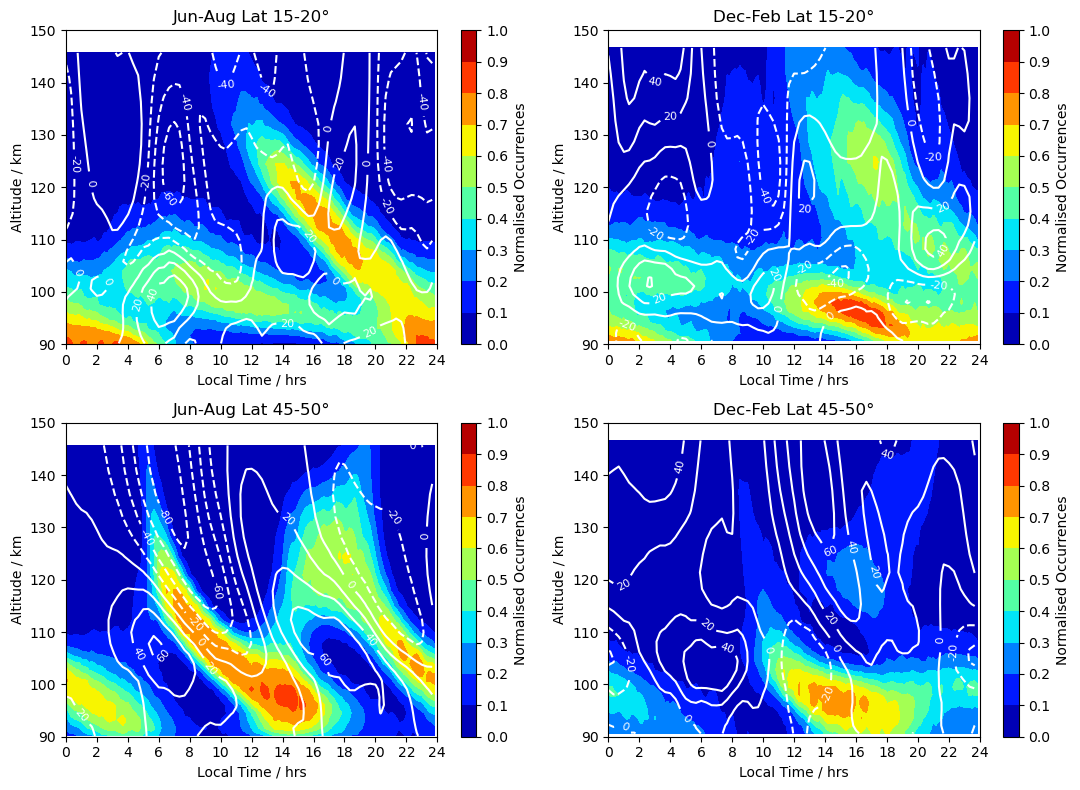

In [164]:
import matplotlib.pyplot as plt
import numpy as np

plot_data_U_summer = [plotdata['U_plot_17.5_summer'][:, ::2], plotdata['U_plot_47.5_summer'][:, ::2]]
plot_data_U_winter = [plotdata['U_plot_17.5_winter'][:, ::2], plotdata['U_plot_47.5_winter'][:, ::2]]

plot_data_alt_summer = [plotdata['alt_plot_17.5_summer'], plotdata['alt_plot_47.5_summer']]
plot_data_alt_winter = [plotdata['alt_plot_17.5_winter'], plotdata['alt_plot_47.5_winter']]

plot_data_SpEs_summer = [SpEs_sum_altLT_15_20_norm_Smax, SpEs_sum_altLT_45_50_norm_Smax]
plot_data_SpEs_winter = [SpEs_win_altLT_15_20_norm_Smax, SpEs_win_altLT_45_50_norm_Smax]


vmin_waccm = 0
vmax_waccm = 1  
nolevs_waccm = 11  

vmin_u = -80
vmax_u = 80
no_levels_u = 9

local_times = np.linspace(0, 24, 144, endpoint=False)
local_times_downsampled = local_times[::2]

latitude_slices = [(15, 20), (45, 50)]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8)) 

for i, ax_row in enumerate(axes):
    lat_start, lat_end = latitude_slices[i]

    ax_s = axes[i, 0]
    contour_waccm_sum = ax_s.contourf(local_times, altavg_sl_sum_Smax, plot_data_SpEs_summer[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_sum = ax_s.contour(local_times_downsampled, altavg_sl_sum_Smax, plot_data_U_summer[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_s.clabel(contour_U_lines_sum, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_sum, ax=ax_s, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')

    ax_s.set_ylim(90, 150)
    ax_s.set_xlabel('Local Time / hrs')
    ax_s.set_ylabel('Altitude / km')
    ax_s.set_title(f'Jun-Aug Lat {lat_start}-{lat_end}\u00b0')
    ax_s.set_xticks(np.linspace(0, 24, 13))

    
    
    ax_w = axes[i, 1]
    contour_waccm_win = ax_w.contourf(local_times, altavg_sl_win_Smax, plot_data_SpEs_winter[i], cmap='jet',
                                       levels=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm), vmin=vmin_waccm, vmax=vmax_waccm)
    
    contour_U_lines_win = ax_w.contour(local_times_downsampled, altavg_sl_win_Smax, plot_data_U_winter[i], colors='white',
                                       levels=np.linspace(vmin_u, vmax_u, no_levels_u))
    
    ax_w.clabel(contour_U_lines_win, fmt='%2.0f', colors='white', fontsize=8)

    cbar_waccm = fig.colorbar(contour_waccm_win, ax=ax_w, orientation='vertical', ticks=np.linspace(vmin_waccm, vmax_waccm, nolevs_waccm))
    cbar_waccm.set_label(r'Normalised Occurrences')
    
    ax_w.set_ylim(90, 150)
    ax_w.set_xlabel('Local Time / hrs')
    ax_w.set_ylabel('Altitude / km')
    ax_w.set_title(f'Dec-Feb Lat {lat_start}-{lat_end}\u00b0')
    ax_w.set_xticks(np.linspace(0, 24, 13))

plt.tight_layout()

figname = f'{run_name}_Norm_Nocc_U_altLT_lats_seasons.png'
plt.savefig('Figures/Wuhu_IonTr_run/Winds/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()

